In [2]:
!pip install llama_index
!pip install pypdf
!pip install openai
!pip install transformers
!pip install sentence-transformers

!pip uninstall cvxpy numpy
!pip install cvxpy numpy
!pip install --upgrade cvxpy numpy scipy



Found existing installation: cvxpy 1.4.0
Uninstalling cvxpy-1.4.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/_cvxcore.cpython-310-x86_64-linux-gnu.so
    /usr/local/lib/python3.10/dist-packages/_cvxpy_sparsecholesky.cpython-310-x86_64-linux-gnu.so
    /usr/local/lib/python3.10/dist-packages/cvxpy-1.4.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/cvxpy/*
    /usr/local/lib/python3.10/dist-packages/setup/*
Proceed (Y/n)? Y
  Successfully uninstalled cvxpy-1.4.0
Found existing installation: numpy 1.26.0
Uninstalling numpy-1.26.0:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.10/dist-packages/numpy-1.26.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/

In [ ]:

import sys
import openai
import os

from llama_index.finetuning import (
    generate_qa_embedding_pairs,
    EmbeddingQAFinetuneDataset,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

sys.path.insert(0,'/content/drive/MyDrive/Stanford_Research/Work/finetune-embedding-main/data')



In [ ]:
!pwd

/content


# **LLAMAINDEX FINETUNING METHOD**

It is a Python script for a machine learning workflow that appears to be focused on fine-tuning an embedding model for question answering (QA) tasks using the Llama Index library and evaluating it.

Here's a brief overview of what the script does:



1.   It imports various libraries and modules, including ones related to loading and processing PDF documents, creating QA datasets, fine-tuning an embedding model, and evaluating the model.
2.   PDF documents ("lyft_2021.pdf" and "uber_2021.pdf") are loaded and processed to extract text content using the Llama Index library.


3.   The extracted text is used to generate QA datasets for training and validation.

4.   An embedding model is fine-tuned using the training dataset. The fine-tuned model is stored in the "model_output_test" directory.


5.   The script evaluates the fine-tuned model's performance on the validation dataset and compares it with other embedding models ("ada" and "bge").

6.   The evaluation results are displayed using the display_results function.








## Generate corpus

In [ ]:
import json

from llama_index import SimpleDirectoryReader
from llama_index.node_parser import SimpleNodeParser
from llama_index.schema import MetadataMode

In [ ]:
#TRAIN_FILES = ["/content/drive/MyDrive/Stanford_Research/Work/finetune-embedding-main/data/lyft_2021.pdf"]
#VAL_FILES = ["/content/drive/MyDrive/Stanford_Research/Work/finetune-embedding-main/data/uber_2021.pdf"]

#TRAIN_CORPUS_FPATH = "content/drive/MyDrive/Stanford_Research/Work/finetune-embedding-main/data/train_corpus.json"
#VAL_CORPUS_FPATH = "content/drive/MyDrive/Stanford_Research/Work/finetune-embedding-main/data/val_corpus.json"

In [ ]:
TRAIN_FILES = ["lyft_2021.pdf"]
VAL_FILES = ["uber_2021.pdf"]

TRAIN_CORPUS_FPATH = "train_corpus.json"
VAL_CORPUS_FPATH = "val_corpus.json"

In [ ]:
def load_corpus(files, verbose=False):
    if verbose:
        print(f"Loading files {files}")

    reader = SimpleDirectoryReader(input_files=files)
    docs = reader.load_data()
    if verbose:
        print(f"Loaded {len(docs)} docs")

    parser = SimpleNodeParser.from_defaults()
    nodes = parser.get_nodes_from_documents(docs, show_progress=verbose)

    if verbose:
        print(f"Parsed {len(nodes)} nodes")

    return nodes

In [ ]:
train_nodes = load_corpus(TRAIN_FILES, verbose=True)
val_nodes = load_corpus(VAL_FILES, verbose=True)

Loading files ['lyft_2021.pdf']
Loaded 144 docs


Parsing documents into nodes:   0%|          | 0/144 [00:00<?, ?it/s]

Parsed 225 nodes
Loading files ['uber_2021.pdf']
Loaded 160 docs


Parsing documents into nodes:   0%|          | 0/160 [00:00<?, ?it/s]

Parsed 842 nodes


## Set up OpenAI API key

In [ ]:

# Set OpenAI API key
openai.api_key = ""

# Set the OPENAI_API_KEY environment variable
os.environ["OPENAI_API_KEY"] = ""

Testing the API key

In [ ]:
import os
import openai

openai.api_key = ""

openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "user", "content": "What is BERT"}
  ]
  )

<OpenAIObject chat.completion id=chatcmpl-85edSFoAd7DtEbMJwrMM6xAoK6XQL at 0x793d7afe9350> JSON: {
  "id": "chatcmpl-85edSFoAd7DtEbMJwrMM6xAoK6XQL",
  "object": "chat.completion",
  "created": 1696358534,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "BERT stands for Bidirectional Encoder Representations from Transformers. It is a natural language processing (NLP) model developed by Google in 2018. BERT is a pre-trained model that uses the transformer architecture to understand the context of individual words within a sentence by considering the surrounding words on both sides. It can then generate contextualized word embeddings that capture the meaning of a word in the given context.\n\nBERT has achieved state-of-the-art results in various NLP tasks, such as text classification, named entity recognition, question answering, and sentiment analysis. It has been widely adopted in both academia an

In [ ]:

train_dataset = generate_qa_embedding_pairs(train_nodes)
val_dataset = generate_qa_embedding_pairs(val_nodes)

train_dataset.save_json("train_dataset.json")
val_dataset.save_json("val_dataset.json")


 19%|█▊        | 42/225 [04:36<18:25,  6.04s/it]WARNING:llama_index.llms.openai_utils:Retrying llama_index.llms.openai_utils.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised APIError: HTTP code 502 from API (<html>
<head><title>502 Bad Gateway</title></head>
<body>
<center><h1>502 Bad Gateway</h1></center>
<hr><center>cloudflare</center>
</body>
</html>
).
100%|██████████| 842/842 [1:38:04<00:00,  6.99s/it]


In [ ]:
# [Optional] Load
train_dataset = EmbeddingQAFinetuneDataset.from_json("train_dataset.json")
val_dataset = EmbeddingQAFinetuneDataset.from_json("val_dataset.json")

## Run Embedding Finetuning

In [ ]:

from llama_index.finetuning import EmbeddingAdapterFinetuneEngine
from llama_index.embeddings import resolve_embed_model
import torch

base_embed_model = resolve_embed_model("local:BAAI/bge-small-en")

finetune_engine = EmbeddingAdapterFinetuneEngine(
    train_dataset,
    base_embed_model,
    model_output_path="model_output_test",
    # bias=True,
    epochs=10,
    verbose=True,
    # optimizer_class=torch.optim.SGD,
    # optimizer_params={"lr": 0.01}
)

In [ ]:
finetune_engine.finetune()

> Prepared optimizer, scheduler, and loss model.


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 0] Current loss: 1.646192193031311
> [Epoch 0] Current loss: 1.6520363092422485
> [Epoch 0] Current loss: 1.4205915927886963
> [Epoch 0] Current loss: 1.6288471221923828
> [Epoch 0] Current loss: 1.5414564609527588
> [Epoch 0] Current loss: 1.8560056686401367
> [Epoch 0] Current loss: 1.850135087966919
> [Epoch 0] Current loss: 1.585527777671814
> [Epoch 0] Current loss: 1.6542062759399414
> [Epoch 0] Current loss: 1.6488244533538818
> [Epoch 0] Current loss: 1.6771793365478516
> [Epoch 0] Current loss: 1.7440311908721924
> [Epoch 0] Current loss: 1.55445396900177
> [Epoch 0] Current loss: 1.6463159322738647
> [Epoch 0] Current loss: 1.6005592346191406
> [Epoch 0] Current loss: 1.6214570999145508
> [Epoch 0] Current loss: 1.3978869915008545
> [Epoch 0] Current loss: 1.6885820627212524
> [Epoch 0] Current loss: 1.491518259048462
> [Epoch 0] Current loss: 1.7640855312347412
> [Epoch 0] Current loss: 1.877587914466858
> [Epoch 0] Current loss: 2.0084028244018555
> [Epoch 0] Curre

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 1] Current loss: 1.6365654468536377
> [Epoch 1] Current loss: 1.64364755153656
> [Epoch 1] Current loss: 1.4071089029312134
> [Epoch 1] Current loss: 1.6200498342514038
> [Epoch 1] Current loss: 1.5332365036010742
> [Epoch 1] Current loss: 1.8491392135620117
> [Epoch 1] Current loss: 1.8411118984222412
> [Epoch 1] Current loss: 1.5727894306182861
> [Epoch 1] Current loss: 1.6409486532211304
> [Epoch 1] Current loss: 1.6358705759048462
> [Epoch 1] Current loss: 1.6643829345703125
> [Epoch 1] Current loss: 1.7333511114120483
> [Epoch 1] Current loss: 1.541326880455017
> [Epoch 1] Current loss: 1.6291046142578125
> [Epoch 1] Current loss: 1.5856366157531738
> [Epoch 1] Current loss: 1.603197693824768
> [Epoch 1] Current loss: 1.3768112659454346
> [Epoch 1] Current loss: 1.6760717630386353
> [Epoch 1] Current loss: 1.4712071418762207
> [Epoch 1] Current loss: 1.7521454095840454
> [Epoch 1] Current loss: 1.8669019937515259
> [Epoch 1] Current loss: 1.993017554283142
> [Epoch 1] Cur

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 2] Current loss: 1.6105916500091553
> [Epoch 2] Current loss: 1.6245883703231812
> [Epoch 2] Current loss: 1.379022240638733
> [Epoch 2] Current loss: 1.5990173816680908
> [Epoch 2] Current loss: 1.51566481590271
> [Epoch 2] Current loss: 1.8357423543930054
> [Epoch 2] Current loss: 1.8238624334335327
> [Epoch 2] Current loss: 1.5500582456588745
> [Epoch 2] Current loss: 1.6176429986953735
> [Epoch 2] Current loss: 1.6135711669921875
> [Epoch 2] Current loss: 1.6428254842758179
> [Epoch 2] Current loss: 1.7154535055160522
> [Epoch 2] Current loss: 1.5198899507522583
> [Epoch 2] Current loss: 1.6023619174957275
> [Epoch 2] Current loss: 1.5641453266143799
> [Epoch 2] Current loss: 1.5777404308319092
> [Epoch 2] Current loss: 1.348026990890503
> [Epoch 2] Current loss: 1.658302903175354
> [Epoch 2] Current loss: 1.4439055919647217
> [Epoch 2] Current loss: 1.7349532842636108
> [Epoch 2] Current loss: 1.8519861698150635
> [Epoch 2] Current loss: 1.9719651937484741
> [Epoch 2] Cur

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 3] Current loss: 1.588592529296875
> [Epoch 3] Current loss: 1.6087713241577148
> [Epoch 3] Current loss: 1.3551326990127563
> [Epoch 3] Current loss: 1.5808736085891724
> [Epoch 3] Current loss: 1.5011755228042603
> [Epoch 3] Current loss: 1.8241240978240967
> [Epoch 3] Current loss: 1.8090120553970337
> [Epoch 3] Current loss: 1.5304079055786133
> [Epoch 3] Current loss: 1.597198724746704
> [Epoch 3] Current loss: 1.594063639640808
> [Epoch 3] Current loss: 1.6238040924072266
> [Epoch 3] Current loss: 1.6997219324111938
> [Epoch 3] Current loss: 1.5012829303741455
> [Epoch 3] Current loss: 1.5790475606918335
> [Epoch 3] Current loss: 1.546191930770874
> [Epoch 3] Current loss: 1.5561217069625854
> [Epoch 3] Current loss: 1.323620080947876
> [Epoch 3] Current loss: 1.6427217721939087
> [Epoch 3] Current loss: 1.42123281955719
> [Epoch 3] Current loss: 1.7203153371810913
> [Epoch 3] Current loss: 1.8396098613739014
> [Epoch 3] Current loss: 1.9543049335479736
> [Epoch 3] Curre

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 4] Current loss: 1.5702588558197021
> [Epoch 4] Current loss: 1.5958131551742554
> [Epoch 4] Current loss: 1.3352258205413818
> [Epoch 4] Current loss: 1.5655089616775513
> [Epoch 4] Current loss: 1.48940110206604
> [Epoch 4] Current loss: 1.8142082691192627
> [Epoch 4] Current loss: 1.7964451313018799
> [Epoch 4] Current loss: 1.5137401819229126
> [Epoch 4] Current loss: 1.5796213150024414
> [Epoch 4] Current loss: 1.5773509740829468
> [Epoch 4] Current loss: 1.6074111461639404
> [Epoch 4] Current loss: 1.6861250400543213
> [Epoch 4] Current loss: 1.485429048538208
> [Epoch 4] Current loss: 1.5591626167297363
> [Epoch 4] Current loss: 1.5313856601715088
> [Epoch 4] Current loss: 1.5379750728607178
> [Epoch 4] Current loss: 1.3032519817352295
> [Epoch 4] Current loss: 1.6293331384658813
> [Epoch 4] Current loss: 1.4026384353637695
> [Epoch 4] Current loss: 1.7080703973770142
> [Epoch 4] Current loss: 1.8293607234954834
> [Epoch 4] Current loss: 1.93964421749115
> [Epoch 4] Cur

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 5] Current loss: 1.5552431344985962
> [Epoch 5] Current loss: 1.5853599309921265
> [Epoch 5] Current loss: 1.3190025091171265
> [Epoch 5] Current loss: 1.5527652502059937
> [Epoch 5] Current loss: 1.4799878597259521
> [Epoch 5] Current loss: 1.8059269189834595
> [Epoch 5] Current loss: 1.7860400676727295
> [Epoch 5] Current loss: 1.4999308586120605
> [Epoch 5] Current loss: 1.564888596534729
> [Epoch 5] Current loss: 1.563391923904419
> [Epoch 5] Current loss: 1.5936676263809204
> [Epoch 5] Current loss: 1.6746515035629272
> [Epoch 5] Current loss: 1.4722392559051514
> [Epoch 5] Current loss: 1.5426563024520874
> [Epoch 5] Current loss: 1.519403338432312
> [Epoch 5] Current loss: 1.5230424404144287
> [Epoch 5] Current loss: 1.2866277694702148
> [Epoch 5] Current loss: 1.618129014968872
> [Epoch 5] Current loss: 1.3876612186431885
> [Epoch 5] Current loss: 1.6980531215667725
> [Epoch 5] Current loss: 1.820972204208374
> [Epoch 5] Current loss: 1.92770254611969
> [Epoch 5] Curre

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 6] Current loss: 1.5432384014129639
> [Epoch 6] Current loss: 1.5771174430847168
> [Epoch 6] Current loss: 1.306157112121582
> [Epoch 6] Current loss: 1.5424845218658447
> [Epoch 6] Current loss: 1.4726293087005615
> [Epoch 6] Current loss: 1.799220085144043
> [Epoch 6] Current loss: 1.7776834964752197
> [Epoch 6] Current loss: 1.4888534545898438
> [Epoch 6] Current loss: 1.5529532432556152
> [Epoch 6] Current loss: 1.5521214008331299
> [Epoch 6] Current loss: 1.5825409889221191
> [Epoch 6] Current loss: 1.6652915477752686
> [Epoch 6] Current loss: 1.4616196155548096
> [Epoch 6] Current loss: 1.5294262170791626
> [Epoch 6] Current loss: 1.5099806785583496
> [Epoch 6] Current loss: 1.5111361742019653
> [Epoch 6] Current loss: 1.2734906673431396
> [Epoch 6] Current loss: 1.6090854406356812
> [Epoch 6] Current loss: 1.3759357929229736
> [Epoch 6] Current loss: 1.6901137828826904
> [Epoch 6] Current loss: 1.81427800655365
> [Epoch 6] Current loss: 1.9182634353637695
> [Epoch 6] Cu

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 7] Current loss: 1.5339957475662231
> [Epoch 7] Current loss: 1.570859432220459
> [Epoch 7] Current loss: 1.2964146137237549
> [Epoch 7] Current loss: 1.5345265865325928
> [Epoch 7] Current loss: 1.4670765399932861
> [Epoch 7] Current loss: 1.7940342426300049
> [Epoch 7] Current loss: 1.7712749242782593
> [Epoch 7] Current loss: 1.4803826808929443
> [Epoch 7] Current loss: 1.5437604188919067
> [Epoch 7] Current loss: 1.5434608459472656
> [Epoch 7] Current loss: 1.573981761932373
> [Epoch 7] Current loss: 1.658034086227417
> [Epoch 7] Current loss: 1.453480839729309
> [Epoch 7] Current loss: 1.5193508863449097
> [Epoch 7] Current loss: 1.502903699874878
> [Epoch 7] Current loss: 1.5021092891693115
> [Epoch 7] Current loss: 1.2636206150054932
> [Epoch 7] Current loss: 1.6021665334701538
> [Epoch 7] Current loss: 1.367180347442627
> [Epoch 7] Current loss: 1.68412184715271
> [Epoch 7] Current loss: 1.8091691732406616
> [Epoch 7] Current loss: 1.9111433029174805
> [Epoch 7] Curren

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 8] Current loss: 1.5273253917694092
> [Epoch 8] Current loss: 1.566415548324585
> [Epoch 8] Current loss: 1.2895517349243164
> [Epoch 8] Current loss: 1.528781533241272
> [Epoch 8] Current loss: 1.463139533996582
> [Epoch 8] Current loss: 1.790325403213501
> [Epoch 8] Current loss: 1.7667341232299805
> [Epoch 8] Current loss: 1.474411964416504
> [Epoch 8] Current loss: 1.5372511148452759
> [Epoch 8] Current loss: 1.537335991859436
> [Epoch 8] Current loss: 1.5679290294647217
> [Epoch 8] Current loss: 1.6528618335723877
> [Epoch 8] Current loss: 1.4477475881576538
> [Epoch 8] Current loss: 1.5123193264007568
> [Epoch 8] Current loss: 1.4980119466781616
> [Epoch 8] Current loss: 1.495851993560791
> [Epoch 8] Current loss: 1.2568427324295044
> [Epoch 8] Current loss: 1.5973328351974487
> [Epoch 8] Current loss: 1.361185073852539
> [Epoch 8] Current loss: 1.6799728870391846
> [Epoch 8] Current loss: 1.8055788278579712
> [Epoch 8] Current loss: 1.906216025352478
> [Epoch 8] Current

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 9] Current loss: 1.5230977535247803
> [Epoch 9] Current loss: 1.5636718273162842
> [Epoch 9] Current loss: 1.2854026556015015
> [Epoch 9] Current loss: 1.52516770362854
> [Epoch 9] Current loss: 1.4606873989105225
> [Epoch 9] Current loss: 1.7880618572235107
> [Epoch 9] Current loss: 1.763998031616211
> [Epoch 9] Current loss: 1.4708588123321533
> [Epoch 9] Current loss: 1.5333763360977173
> [Epoch 9] Current loss: 1.533686637878418
> [Epoch 9] Current loss: 1.5643351078033447
> [Epoch 9] Current loss: 1.6497623920440674
> [Epoch 9] Current loss: 1.4443600177764893
> [Epoch 9] Current loss: 1.5082454681396484
> [Epoch 9] Current loss: 1.4951913356781006
> [Epoch 9] Current loss: 1.4922831058502197
> [Epoch 9] Current loss: 1.253028392791748
> [Epoch 9] Current loss: 1.5945500135421753
> [Epoch 9] Current loss: 1.3578091859817505
> [Epoch 9] Current loss: 1.6775929927825928
> [Epoch 9] Current loss: 1.803468108177185
> [Epoch 9] Current loss: 1.9034004211425781
> [Epoch 9] Curr

In [ ]:

embed_model = finetune_engine.get_finetuned_model()

# alternatively import model
# from llama_index.embeddings import LinearAdapterEmbeddingModel
# embed_model = LinearAdapterEmbeddingModel(base_embed_model, "model_output_test")

## Evaluate Finetuned model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Stanford_Research/Work/finetune-embedding-main/data')

import eval_utils

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from llama_index.embeddings import OpenAIEmbedding
from llama_index import ServiceContext, VectorStoreIndex
from llama_index.schema import TextNode
from tqdm.notebook import tqdm
import pandas as pd

from eval_utils import evaluate, display_results


ada = OpenAIEmbedding()
ada_val_results = evaluate(val_dataset, ada)

Generating embeddings:   0%|          | 0/395 [00:00<?, ?it/s]



  0%|          | 0/790 [00:00<?, ?it/s]

  0%|          | 1/790 [00:00<03:04,  4.27it/s]

  0%|          | 2/790 [00:00<02:56,  4.45it/s]

  0%|          | 3/790 [00:00<02:46,  4.74it/s]

  1%|          | 4/790 [00:00<02:49,  4.63it/s]

  1%|          | 5/790 [00:01<02:44,  4.78it/s]

  1%|          | 6/790 [00:01<02:48,  4.67it/s]

  1%|          | 7/790 [00:02<06:03,  2.15it/s]

  1%|          | 8/790 [00:02<05:09,  2.53it/s]

  1%|          | 9/790 [00:02<04:17,  3.03it/s]

  1%|▏         | 10/790 [00:02<03:46,  3.44it/s]

  1%|▏         | 11/790 [00:03<03:27,  3.76it/s]

  2%|▏         | 12/790 [00:03<03:15,  3.97it/s]

  2%|▏         | 13/790 [00:03<03:03,  4.23it/s]

  2%|▏         | 14/790 [00:03<03:13,  4.00it/s]

  2%|▏         | 15/790 [00:04<03:15,  3.97it/s]

  2%|▏         | 16/790 [00:04<03:08,  4.12it/s]

  2%|▏         | 17/790 [00:04<03:15,  3.95it/s]

  2%|▏         | 18/790 [00:04<03:04,  4.19it/s]

  2%|▏         | 19/790 [00:04<02:52,  4.48it/s]

  3%|▎         |

In [ ]:
display_results(["ada"], [ada_val_results])

,retrievers,hit_rate,mrr
0,ada,0.870886,0.729578


In [ ]:
bge = "local:BAAI/bge-small-en"
bge_val_results = evaluate(val_dataset, bge)

Generating embeddings:   0%|          | 0/395 [00:00<?, ?it/s]



  0%|          | 0/790 [00:00<?, ?it/s]

  1%|          | 4/790 [00:00<00:21, 37.21it/s]

  1%|          | 8/790 [00:00<00:21, 36.19it/s]

  2%|▏         | 12/790 [00:00<00:22, 34.35it/s]

  2%|▏         | 16/790 [00:00<00:22, 34.07it/s]

  3%|▎         | 20/790 [00:00<00:22, 34.20it/s]

  3%|▎         | 24/790 [00:00<00:23, 32.45it/s]

  4%|▎         | 28/790 [00:00<00:23, 32.61it/s]

  4%|▍         | 32/790 [00:00<00:22, 33.21it/s]

  5%|▍         | 36/790 [00:01<00:22, 33.65it/s]

  5%|▌         | 40/790 [00:01<00:22, 34.04it/s]

  6%|▌         | 44/790 [00:01<00:22, 33.85it/s]

  6%|▌         | 48/790 [00:01<00:21, 34.50it/s]

  7%|▋         | 52/790 [00:01<00:21, 35.01it/s]

  7%|▋         | 56/790 [00:01<00:22, 32.88it/s]

  8%|▊         | 60/790 [00:01<00:21, 33.37it/s]

  8%|▊         | 64/790 [00:01<00:22, 32.92it/s]

  9%|▊         | 68/790 [00:02<00:21, 34.17it/s]

  9%|▉         | 72/790 [00:02<00:20, 34.82it/s]

 10%|▉         | 76/790 [00:02<00:20, 34.65it/s]

 10%|█   

In [ ]:
display_results(["bge"], [bge_val_results])

,retrievers,hit_rate,mrr
0,bge,0.787342,0.643038


In [ ]:
ft_val_results = evaluate(val_dataset, embed_model)


Generating embeddings:   0%|          | 0/395 [00:00<?, ?it/s]



  0%|          | 0/790 [00:00<?, ?it/s]

  1%|          | 4/790 [00:00<00:24, 32.45it/s]

  1%|          | 8/790 [00:00<00:24, 31.85it/s]

  2%|▏         | 12/790 [00:00<00:24, 31.17it/s]

  2%|▏         | 16/790 [00:00<00:24, 31.62it/s]

  3%|▎         | 20/790 [00:00<00:24, 31.96it/s]

  3%|▎         | 24/790 [00:00<00:23, 32.34it/s]

  4%|▎         | 28/790 [00:00<00:23, 32.57it/s]

  4%|▍         | 32/790 [00:00<00:23, 32.88it/s]

  5%|▍         | 36/790 [00:01<00:22, 33.44it/s]

  5%|▌         | 40/790 [00:01<00:22, 33.25it/s]

  6%|▌         | 44/790 [00:01<00:27, 27.52it/s]

  6%|▌         | 47/790 [00:01<00:29, 25.09it/s]

  6%|▋         | 50/790 [00:01<00:31, 23.73it/s]

  7%|▋         | 53/790 [00:01<00:32, 22.61it/s]

  7%|▋         | 56/790 [00:02<00:33, 22.13it/s]

  7%|▋         | 59/790 [00:02<00:34, 21.43it/s]

  8%|▊         | 62/790 [00:02<00:34, 21.12it/s]

  8%|▊         | 65/790 [00:02<00:36, 20.09it/s]

  9%|▊         | 68/790 [00:02<00:35, 20.16it/s]

  9%|▉   

In [ ]:
display_results(["ft"], [ft_val_results])


,retrievers,hit_rate,mrr
0,ft,0.803797,0.669177


In [ ]:
display_results(
    ["ada", "bge", "ft"], [ada_val_results, bge_val_results, ft_val_results]
)


,retrievers,hit_rate,mrr
0,ada,0.870886,0.729578
1,bge,0.787342,0.643038
2,ft,0.803797,0.669177


# **1. Finetune a 2-layer model**

In [ ]:
# requires torch dependency
from llama_index.embeddings.adapter_utils import TwoLayerNN

from llama_index.finetuning import EmbeddingAdapterFinetuneEngine
from llama_index.embeddings import resolve_embed_model
from llama_index.embeddings import AdapterEmbeddingModel

from llama_index.embeddings import OpenAIEmbedding
from llama_index import ServiceContext, VectorStoreIndex
from llama_index.schema import TextNode
from tqdm.notebook import tqdm
import pandas as pd

from eval_utils import evaluate, display_results

In [ ]:
base_embed_model = resolve_embed_model("local:BAAI/bge-small-en")
adapter_model = TwoLayerNN(
    384,  # input dimension
    1024,  # hidden dimension
    384,  # output dimension
    bias=True,
    add_residual=True,
)

finetune_engine = EmbeddingAdapterFinetuneEngine(
    train_dataset,
    base_embed_model,
    model_output_path="model5_output_test",
    model_checkpoint_path="model5_ck",
    adapter_model=adapter_model,
    epochs=25,
    verbose=True,
)

In [ ]:

finetune_engine.finetune()



> Prepared optimizer, scheduler, and loss model.


Epoch:   0%|          | 0/25 [00:00<?, ?it/s]

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 0] Current loss: 1.646192193031311
> [Epoch 0] Current loss: 1.6520363092422485
> [Epoch 0] Current loss: 1.420600175857544
> [Epoch 0] Current loss: 1.6288890838623047
> [Epoch 0] Current loss: 1.5415053367614746
> [Epoch 0] Current loss: 1.8560264110565186
> [Epoch 0] Current loss: 1.8502382040023804
> [Epoch 0] Current loss: 1.585644006729126
> [Epoch 0] Current loss: 1.6543314456939697
> [Epoch 0] Current loss: 1.6490020751953125
> [Epoch 0] Current loss: 1.6774625778198242
> [Epoch 0] Current loss: 1.744253396987915
> [Epoch 0] Current loss: 1.5547125339508057
> [Epoch 0] Current loss: 1.6468687057495117
> [Epoch 0] Current loss: 1.6010396480560303
> [Epoch 0] Current loss: 1.6222060918807983
> [Epoch 0] Current loss: 1.3988187313079834
> [Epoch 0] Current loss: 1.688978910446167
> [Epoch 0] Current loss: 1.4922974109649658
> [Epoch 0] Current loss: 1.764836311340332
> [Epoch 0] Current loss: 1.8781518936157227
> [Epoch 0] Current loss: 2.0092148780822754
> [Epoch 0] Curr

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 1] Current loss: 1.6461915969848633
> [Epoch 1] Current loss: 1.6520363092422485
> [Epoch 1] Current loss: 1.4206002950668335
> [Epoch 1] Current loss: 1.6288869380950928
> [Epoch 1] Current loss: 1.54150390625
> [Epoch 1] Current loss: 1.8560250997543335
> [Epoch 1] Current loss: 1.8502380847930908
> [Epoch 1] Current loss: 1.5856401920318604
> [Epoch 1] Current loss: 1.6543292999267578
> [Epoch 1] Current loss: 1.648999571800232
> [Epoch 1] Current loss: 1.6774593591690063
> [Epoch 1] Current loss: 1.7442508935928345
> [Epoch 1] Current loss: 1.5547128915786743
> [Epoch 1] Current loss: 1.6468627452850342
> [Epoch 1] Current loss: 1.6010395288467407
> [Epoch 1] Current loss: 1.6222003698349
> [Epoch 1] Current loss: 1.398813009262085
> [Epoch 1] Current loss: 1.688976526260376
> [Epoch 1] Current loss: 1.4922891855239868
> [Epoch 1] Current loss: 1.7648327350616455
> [Epoch 1] Current loss: 1.8781499862670898
> [Epoch 1] Current loss: 2.0092179775238037
> [Epoch 1] Current l

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 2] Current loss: 1.6461143493652344
> [Epoch 2] Current loss: 1.6519672870635986
> [Epoch 2] Current loss: 1.4204941987991333
> [Epoch 2] Current loss: 1.6287990808486938
> [Epoch 2] Current loss: 1.5414211750030518
> [Epoch 2] Current loss: 1.8559596538543701
> [Epoch 2] Current loss: 1.8501638174057007
> [Epoch 2] Current loss: 1.585514783859253
> [Epoch 2] Current loss: 1.654203176498413
> [Epoch 2] Current loss: 1.6488758325576782
> [Epoch 2] Current loss: 1.6773382425308228
> [Epoch 2] Current loss: 1.7441438436508179
> [Epoch 2] Current loss: 1.5546162128448486
> [Epoch 2] Current loss: 1.6466789245605469
> [Epoch 2] Current loss: 1.6009165048599243
> [Epoch 2] Current loss: 1.6220147609710693
> [Epoch 2] Current loss: 1.3986032009124756
> [Epoch 2] Current loss: 1.6888494491577148
> [Epoch 2] Current loss: 1.4920661449432373
> [Epoch 2] Current loss: 1.7647085189819336
> [Epoch 2] Current loss: 1.8780405521392822
> [Epoch 2] Current loss: 2.009098768234253
> [Epoch 2] C

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 3] Current loss: 1.6454204320907593
> [Epoch 3] Current loss: 1.6513855457305908
> [Epoch 3] Current loss: 1.4196072816848755
> [Epoch 3] Current loss: 1.6281392574310303
> [Epoch 3] Current loss: 1.5408287048339844
> [Epoch 3] Current loss: 1.855520248413086
> [Epoch 3] Current loss: 1.8496007919311523
> [Epoch 3] Current loss: 1.5846952199935913
> [Epoch 3] Current loss: 1.6533668041229248
> [Epoch 3] Current loss: 1.6480638980865479
> [Epoch 3] Current loss: 1.6765739917755127
> [Epoch 3] Current loss: 1.7434765100479126
> [Epoch 3] Current loss: 1.553891897201538
> [Epoch 3] Current loss: 1.6456239223480225
> [Epoch 3] Current loss: 1.6000862121582031
> [Epoch 3] Current loss: 1.620949149131775
> [Epoch 3] Current loss: 1.3973881006240845
> [Epoch 3] Current loss: 1.6881014108657837
> [Epoch 3] Current loss: 1.4908607006072998
> [Epoch 3] Current loss: 1.764036774635315
> [Epoch 3] Current loss: 1.8773822784423828
> [Epoch 3] Current loss: 2.0082638263702393
> [Epoch 3] Cu

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 4] Current loss: 1.6434459686279297
> [Epoch 4] Current loss: 1.6497771739959717
> [Epoch 4] Current loss: 1.4171974658966064
> [Epoch 4] Current loss: 1.6263453960418701
> [Epoch 4] Current loss: 1.5392940044403076
> [Epoch 4] Current loss: 1.8543869256973267
> [Epoch 4] Current loss: 1.848128318786621
> [Epoch 4] Current loss: 1.582614779472351
> [Epoch 4] Current loss: 1.6512523889541626
> [Epoch 4] Current loss: 1.6460144519805908
> [Epoch 4] Current loss: 1.6746737957000732
> [Epoch 4] Current loss: 1.7418180704116821
> [Epoch 4] Current loss: 1.5520325899124146
> [Epoch 4] Current loss: 1.6430857181549072
> [Epoch 4] Current loss: 1.5979969501495361
> [Epoch 4] Current loss: 1.618371605873108
> [Epoch 4] Current loss: 1.3944122791290283
> [Epoch 4] Current loss: 1.6863267421722412
> [Epoch 4] Current loss: 1.488018274307251
> [Epoch 4] Current loss: 1.762486219406128
> [Epoch 4] Current loss: 1.875812292098999
> [Epoch 4] Current loss: 2.0062074661254883
> [Epoch 4] Curr

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 5] Current loss: 1.6396242380142212
> [Epoch 5] Current loss: 1.6467205286026
> [Epoch 5] Current loss: 1.4126121997833252
> [Epoch 5] Current loss: 1.6229221820831299
> [Epoch 5] Current loss: 1.5364553928375244
> [Epoch 5] Current loss: 1.852268934249878
> [Epoch 5] Current loss: 1.8453689813613892
> [Epoch 5] Current loss: 1.5787118673324585
> [Epoch 5] Current loss: 1.6473251581192017
> [Epoch 5] Current loss: 1.6421960592269897
> [Epoch 5] Current loss: 1.6711658239364624
> [Epoch 5] Current loss: 1.7387622594833374
> [Epoch 5] Current loss: 1.5485643148422241
> [Epoch 5] Current loss: 1.638464331626892
> [Epoch 5] Current loss: 1.594103217124939
> [Epoch 5] Current loss: 1.6136668920516968
> [Epoch 5] Current loss: 1.3889262676239014
> [Epoch 5] Current loss: 1.6830905675888062
> [Epoch 5] Current loss: 1.4828760623931885
> [Epoch 5] Current loss: 1.7597510814666748
> [Epoch 5] Current loss: 1.872977614402771
> [Epoch 5] Current loss: 2.0024380683898926
> [Epoch 5] Curre

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 6] Current loss: 1.6335070133209229
> [Epoch 6] Current loss: 1.6419200897216797
> [Epoch 6] Current loss: 1.405432939529419
> [Epoch 6] Current loss: 1.617492437362671
> [Epoch 6] Current loss: 1.5321146249771118
> [Epoch 6] Current loss: 1.8489811420440674
> [Epoch 6] Current loss: 1.8410890102386475
> [Epoch 6] Current loss: 1.5726587772369385
> [Epoch 6] Current loss: 1.6412599086761475
> [Epoch 6] Current loss: 1.6363264322280884
> [Epoch 6] Current loss: 1.6657880544662476
> [Epoch 6] Current loss: 1.734074592590332
> [Epoch 6] Current loss: 1.543215036392212
> [Epoch 6] Current loss: 1.6314783096313477
> [Epoch 6] Current loss: 1.588157296180725
> [Epoch 6] Current loss: 1.6065847873687744
> [Epoch 6] Current loss: 1.3806018829345703
> [Epoch 6] Current loss: 1.6782172918319702
> [Epoch 6] Current loss: 1.4752203226089478
> [Epoch 6] Current loss: 1.7557283639907837
> [Epoch 6] Current loss: 1.8687912225723267
> [Epoch 6] Current loss: 1.9967896938323975
> [Epoch 6] Cur

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 7] Current loss: 1.6256853342056274
> [Epoch 7] Current loss: 1.6358740329742432
> [Epoch 7] Current loss: 1.396520972251892
> [Epoch 7] Current loss: 1.6105750799179077
> [Epoch 7] Current loss: 1.5268453359603882
> [Epoch 7] Current loss: 1.844940423965454
> [Epoch 7] Current loss: 1.8357841968536377
> [Epoch 7] Current loss: 1.5651590824127197
> [Epoch 7] Current loss: 1.6337759494781494
> [Epoch 7] Current loss: 1.629142165184021
> [Epoch 7] Current loss: 1.6591764688491821
> [Epoch 7] Current loss: 1.7283742427825928
> [Epoch 7] Current loss: 1.5366685390472412
> [Epoch 7] Current loss: 1.6231005191802979
> [Epoch 7] Current loss: 1.580979585647583
> [Epoch 7] Current loss: 1.5982052087783813
> [Epoch 7] Current loss: 1.3706324100494385
> [Epoch 7] Current loss: 1.672384262084961
> [Epoch 7] Current loss: 1.4662705659866333
> [Epoch 7] Current loss: 1.7509721517562866
> [Epoch 7] Current loss: 1.863890290260315
> [Epoch 7] Current loss: 1.9900792837142944
> [Epoch 7] Curr

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 8] Current loss: 1.6170454025268555
> [Epoch 8] Current loss: 1.6292749643325806
> [Epoch 8] Current loss: 1.3867368698120117
> [Epoch 8] Current loss: 1.6029220819473267
> [Epoch 8] Current loss: 1.521136999130249
> [Epoch 8] Current loss: 1.840524673461914
> [Epoch 8] Current loss: 1.8299376964569092
> [Epoch 8] Current loss: 1.5569212436676025
> [Epoch 8] Current loss: 1.6255691051483154
> [Epoch 8] Current loss: 1.621329665184021
> [Epoch 8] Current loss: 1.6519047021865845
> [Epoch 8] Current loss: 1.7221806049346924
> [Epoch 8] Current loss: 1.5295519828796387
> [Epoch 8] Current loss: 1.613983154296875
> [Epoch 8] Current loss: 1.573251485824585
> [Epoch 8] Current loss: 1.5892152786254883
> [Epoch 8] Current loss: 1.359818458557129
> [Epoch 8] Current loss: 1.6660716533660889
> [Epoch 8] Current loss: 1.4567559957504272
> [Epoch 8] Current loss: 1.7457830905914307
> [Epoch 8] Current loss: 1.8586680889129639
> [Epoch 8] Current loss: 1.9829422235488892
> [Epoch 8] Curr

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 9] Current loss: 1.607964277267456
> [Epoch 9] Current loss: 1.6224267482757568
> [Epoch 9] Current loss: 1.3764386177062988
> [Epoch 9] Current loss: 1.594848871231079
> [Epoch 9] Current loss: 1.5152850151062012
> [Epoch 9] Current loss: 1.8358691930770874
> [Epoch 9] Current loss: 1.8237826824188232
> [Epoch 9] Current loss: 1.5482021570205688
> [Epoch 9] Current loss: 1.6168768405914307
> [Epoch 9] Current loss: 1.6131054162979126
> [Epoch 9] Current loss: 1.6441802978515625
> [Epoch 9] Current loss: 1.715703010559082
> [Epoch 9] Current loss: 1.5220792293548584
> [Epoch 9] Current loss: 1.6043580770492554
> [Epoch 9] Current loss: 1.5651861429214478
> [Epoch 9] Current loss: 1.579878568649292
> [Epoch 9] Current loss: 1.348475456237793
> [Epoch 9] Current loss: 1.6594409942626953
> [Epoch 9] Current loss: 1.4469531774520874
> [Epoch 9] Current loss: 1.7403987646102905
> [Epoch 9] Current loss: 1.8533728122711182
> [Epoch 9] Current loss: 1.975582480430603
> [Epoch 9] Curr

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 10] Current loss: 1.5986229181289673
> [Epoch 10] Current loss: 1.6154634952545166
> [Epoch 10] Current loss: 1.365809679031372
> [Epoch 10] Current loss: 1.5864768028259277
> [Epoch 10] Current loss: 1.5093967914581299
> [Epoch 10] Current loss: 1.8311052322387695
> [Epoch 10] Current loss: 1.8174291849136353
> [Epoch 10] Current loss: 1.5391477346420288
> [Epoch 10] Current loss: 1.6078224182128906
> [Epoch 10] Current loss: 1.604601263999939
> [Epoch 10] Current loss: 1.636107087135315
> [Epoch 10] Current loss: 1.7090404033660889
> [Epoch 10] Current loss: 1.5143729448318481
> [Epoch 10] Current loss: 1.5943630933761597
> [Epoch 10] Current loss: 1.5569226741790771
> [Epoch 10] Current loss: 1.57035231590271
> [Epoch 10] Current loss: 1.3367971181869507
> [Epoch 10] Current loss: 1.652578353881836
> [Epoch 10] Current loss: 1.4370396137237549
> [Epoch 10] Current loss: 1.7348954677581787
> [Epoch 10] Current loss: 1.848109245300293
> [Epoch 10] Current loss: 1.968142271041

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 11] Current loss: 1.5891882181167603
> [Epoch 11] Current loss: 1.608508825302124
> [Epoch 11] Current loss: 1.3550341129302979
> [Epoch 11] Current loss: 1.5779540538787842
> [Epoch 11] Current loss: 1.5035778284072876
> [Epoch 11] Current loss: 1.8263046741485596
> [Epoch 11] Current loss: 1.810983657836914
> [Epoch 11] Current loss: 1.5298973321914673
> [Epoch 11] Current loss: 1.5985453128814697
> [Epoch 11] Current loss: 1.5959559679031372
> [Epoch 11] Current loss: 1.6278009414672852
> [Epoch 11] Current loss: 1.702282190322876
> [Epoch 11] Current loss: 1.5065721273422241
> [Epoch 11] Current loss: 1.5841586589813232
> [Epoch 11] Current loss: 1.548620581626892
> [Epoch 11] Current loss: 1.560783863067627
> [Epoch 11] Current loss: 1.324990153312683
> [Epoch 11] Current loss: 1.6455974578857422
> [Epoch 11] Current loss: 1.4271942377090454
> [Epoch 11] Current loss: 1.729364037513733
> [Epoch 11] Current loss: 1.8429778814315796
> [Epoch 11] Current loss: 1.960789918899

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 12] Current loss: 1.5798348188400269
> [Epoch 12] Current loss: 1.6017040014266968
> [Epoch 12] Current loss: 1.3443076610565186
> [Epoch 12] Current loss: 1.569425344467163
> [Epoch 12] Current loss: 1.4979338645935059
> [Epoch 12] Current loss: 1.8215582370758057
> [Epoch 12] Current loss: 1.8045644760131836
> [Epoch 12] Current loss: 1.520625114440918
> [Epoch 12] Current loss: 1.5891973972320557
> [Epoch 12] Current loss: 1.587298035621643
> [Epoch 12] Current loss: 1.6194003820419312
> [Epoch 12] Current loss: 1.6955524682998657
> [Epoch 12] Current loss: 1.4988267421722412
> [Epoch 12] Current loss: 1.573919415473938
> [Epoch 12] Current loss: 1.540432333946228
> [Epoch 12] Current loss: 1.5513197183609009
> [Epoch 12] Current loss: 1.3132623434066772
> [Epoch 12] Current loss: 1.6386181116104126
> [Epoch 12] Current loss: 1.417600393295288
> [Epoch 12] Current loss: 1.7239158153533936
> [Epoch 12] Current loss: 1.838054895401001
> [Epoch 12] Current loss: 1.953680992126

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 13] Current loss: 1.570740818977356
> [Epoch 13] Current loss: 1.5951735973358154
> [Epoch 13] Current loss: 1.3338133096694946
> [Epoch 13] Current loss: 1.561043381690979
> [Epoch 13] Current loss: 1.492550015449524
> [Epoch 13] Current loss: 1.8169361352920532
> [Epoch 13] Current loss: 1.798283338546753
> [Epoch 13] Current loss: 1.511493444442749
> [Epoch 13] Current loss: 1.5799319744110107
> [Epoch 13] Current loss: 1.578772783279419
> [Epoch 13] Current loss: 1.6110503673553467
> [Epoch 13] Current loss: 1.6889533996582031
> [Epoch 13] Current loss: 1.4912630319595337
> [Epoch 13] Current loss: 1.5638295412063599
> [Epoch 13] Current loss: 1.5324891805648804
> [Epoch 13] Current loss: 1.5421276092529297
> [Epoch 13] Current loss: 1.301807165145874
> [Epoch 13] Current loss: 1.6317497491836548
> [Epoch 13] Current loss: 1.408405065536499
> [Epoch 13] Current loss: 1.718634009361267
> [Epoch 13] Current loss: 1.833407998085022
> [Epoch 13] Current loss: 1.946945428848266

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 14] Current loss: 1.5620653629302979
> [Epoch 14] Current loss: 1.589032530784607
> [Epoch 14] Current loss: 1.3237395286560059
> [Epoch 14] Current loss: 1.5529453754425049
> [Epoch 14] Current loss: 1.4874958992004395
> [Epoch 14] Current loss: 1.812512755393982
> [Epoch 14] Current loss: 1.7922340631484985
> [Epoch 14] Current loss: 1.5026546716690063
> [Epoch 14] Current loss: 1.5708954334259033
> [Epoch 14] Current loss: 1.5705283880233765
> [Epoch 14] Current loss: 1.6028916835784912
> [Epoch 14] Current loss: 1.682586431503296
> [Epoch 14] Current loss: 1.4839922189712524
> [Epoch 14] Current loss: 1.554060697555542
> [Epoch 14] Current loss: 1.5249141454696655
> [Epoch 14] Current loss: 1.533338189125061
> [Epoch 14] Current loss: 1.2908074855804443
> [Epoch 14] Current loss: 1.6251052618026733
> [Epoch 14] Current loss: 1.3997242450714111
> [Epoch 14] Current loss: 1.7135940790176392
> [Epoch 14] Current loss: 1.8290859460830688
> [Epoch 14] Current loss: 1.9406824111

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 15] Current loss: 1.5539348125457764
> [Epoch 15] Current loss: 1.5833572149276733
> [Epoch 15] Current loss: 1.3142400979995728
> [Epoch 15] Current loss: 1.5452555418014526
> [Epoch 15] Current loss: 1.4828040599822998
> [Epoch 15] Current loss: 1.8083528280258179
> [Epoch 15] Current loss: 1.7865054607391357
> [Epoch 15] Current loss: 1.4942415952682495
> [Epoch 15] Current loss: 1.5622360706329346
> [Epoch 15] Current loss: 1.562682867050171
> [Epoch 15] Current loss: 1.595056414604187
> [Epoch 15] Current loss: 1.6765273809432983
> [Epoch 15] Current loss: 1.4771376848220825
> [Epoch 15] Current loss: 1.5447707176208496
> [Epoch 15] Current loss: 1.5178160667419434
> [Epoch 15] Current loss: 1.5250606536865234
> [Epoch 15] Current loss: 1.2804346084594727
> [Epoch 15] Current loss: 1.6187942028045654
> [Epoch 15] Current loss: 1.3916583061218262
> [Epoch 15] Current loss: 1.708867073059082
> [Epoch 15] Current loss: 1.8251264095306396
> [Epoch 15] Current loss: 1.93496108

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 16] Current loss: 1.5464515686035156
> [Epoch 16] Current loss: 1.5782098770141602
> [Epoch 16] Current loss: 1.3054454326629639
> [Epoch 16] Current loss: 1.5380680561065674
> [Epoch 16] Current loss: 1.4785044193267822
> [Epoch 16] Current loss: 1.8045107126235962
> [Epoch 16] Current loss: 1.781172752380371
> [Epoch 16] Current loss: 1.4863871335983276
> [Epoch 16] Current loss: 1.5540896654129028
> [Epoch 16] Current loss: 1.5553429126739502
> [Epoch 16] Current loss: 1.5876686573028564
> [Epoch 16] Current loss: 1.6708650588989258
> [Epoch 16] Current loss: 1.4707915782928467
> [Epoch 16] Current loss: 1.5360995531082153
> [Epoch 16] Current loss: 1.5112810134887695
> [Epoch 16] Current loss: 1.517386555671692
> [Epoch 16] Current loss: 1.2708228826522827
> [Epoch 16] Current loss: 1.612898588180542
> [Epoch 16] Current loss: 1.3842833042144775
> [Epoch 16] Current loss: 1.7045114040374756
> [Epoch 16] Current loss: 1.821539282798767
> [Epoch 16] Current loss: 1.929826974

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 17] Current loss: 1.5396859645843506
> [Epoch 17] Current loss: 1.5736271142959595
> [Epoch 17] Current loss: 1.2974567413330078
> [Epoch 17] Current loss: 1.5314850807189941
> [Epoch 17] Current loss: 1.4746205806732178
> [Epoch 17] Current loss: 1.8010238409042358
> [Epoch 17] Current loss: 1.7762973308563232
> [Epoch 17] Current loss: 1.4791947603225708
> [Epoch 17] Current loss: 1.5465751886367798
> [Epoch 17] Current loss: 1.5486043691635132
> [Epoch 17] Current loss: 1.5808418989181519
> [Epoch 17] Current loss: 1.6656606197357178
> [Epoch 17] Current loss: 1.4650237560272217
> [Epoch 17] Current loss: 1.5281648635864258
> [Epoch 17] Current loss: 1.505372405052185
> [Epoch 17] Current loss: 1.510398268699646
> [Epoch 17] Current loss: 1.2620826959609985
> [Epoch 17] Current loss: 1.6074978113174438
> [Epoch 17] Current loss: 1.3776582479476929
> [Epoch 17] Current loss: 1.7005767822265625
> [Epoch 17] Current loss: 1.8183265924453735
> [Epoch 17] Current loss: 1.9252989

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 18] Current loss: 1.5336880683898926
> [Epoch 18] Current loss: 1.5696250200271606
> [Epoch 18] Current loss: 1.290345311164856
> [Epoch 18] Current loss: 1.5255720615386963
> [Epoch 18] Current loss: 1.471163034439087
> [Epoch 18] Current loss: 1.7979156970977783
> [Epoch 18] Current loss: 1.7719306945800781
> [Epoch 18] Current loss: 1.4727485179901123
> [Epoch 18] Current loss: 1.539790391921997
> [Epoch 18] Current loss: 1.5425419807434082
> [Epoch 18] Current loss: 1.5746723413467407
> [Epoch 18] Current loss: 1.6609827280044556
> [Epoch 18] Current loss: 1.459886074066162
> [Epoch 18] Current loss: 1.521055817604065
> [Epoch 18] Current loss: 1.5001360177993774
> [Epoch 18] Current loss: 1.5041598081588745
> [Epoch 18] Current loss: 1.2543004751205444
> [Epoch 18] Current loss: 1.602655053138733
> [Epoch 18] Current loss: 1.3718163967132568
> [Epoch 18] Current loss: 1.6970943212509155
> [Epoch 18] Current loss: 1.815495252609253
> [Epoch 18] Current loss: 1.921375632286

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 19] Current loss: 1.528488278388977
> [Epoch 19] Current loss: 1.5662039518356323
> [Epoch 19] Current loss: 1.2841593027114868
> [Epoch 19] Current loss: 1.520385980606079
> [Epoch 19] Current loss: 1.4681377410888672
> [Epoch 19] Current loss: 1.7952121496200562
> [Epoch 19] Current loss: 1.7681124210357666
> [Epoch 19] Current loss: 1.4671151638031006
> [Epoch 19] Current loss: 1.5338114500045776
> [Epoch 19] Current loss: 1.5372192859649658
> [Epoch 19] Current loss: 1.5692341327667236
> [Epoch 19] Current loss: 1.656873106956482
> [Epoch 19] Current loss: 1.4554216861724854
> [Epoch 19] Current loss: 1.514846682548523
> [Epoch 19] Current loss: 1.495604395866394
> [Epoch 19] Current loss: 1.4987154006958008
> [Epoch 19] Current loss: 1.24753737449646
> [Epoch 19] Current loss: 1.598421573638916
> [Epoch 19] Current loss: 1.3667808771133423
> [Epoch 19] Current loss: 1.6940882205963135
> [Epoch 19] Current loss: 1.8130481243133545
> [Epoch 19] Current loss: 1.9180507659912

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 20] Current loss: 1.5240941047668457
> [Epoch 20] Current loss: 1.5633482933044434
> [Epoch 20] Current loss: 1.2789256572723389
> [Epoch 20] Current loss: 1.5159595012664795
> [Epoch 20] Current loss: 1.465552568435669
> [Epoch 20] Current loss: 1.7929242849349976
> [Epoch 20] Current loss: 1.7648646831512451
> [Epoch 20] Current loss: 1.4623342752456665
> [Epoch 20] Current loss: 1.5287046432495117
> [Epoch 20] Current loss: 1.5326851606369019
> [Epoch 20] Current loss: 1.564584493637085
> [Epoch 20] Current loss: 1.6533701419830322
> [Epoch 20] Current loss: 1.451654314994812
> [Epoch 20] Current loss: 1.5095856189727783
> [Epoch 20] Current loss: 1.4917957782745361
> [Epoch 20] Current loss: 1.4941037893295288
> [Epoch 20] Current loss: 1.2418372631072998
> [Epoch 20] Current loss: 1.5948299169540405
> [Epoch 20] Current loss: 1.3625600337982178
> [Epoch 20] Current loss: 1.691570520401001
> [Epoch 20] Current loss: 1.8109912872314453
> [Epoch 20] Current loss: 1.915309667

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 21] Current loss: 1.5205037593841553
> [Epoch 21] Current loss: 1.5610461235046387
> [Epoch 21] Current loss: 1.2746556997299194
> [Epoch 21] Current loss: 1.512315034866333
> [Epoch 21] Current loss: 1.4634140729904175
> [Epoch 21] Current loss: 1.7910581827163696
> [Epoch 21] Current loss: 1.7622095346450806
> [Epoch 21] Current loss: 1.4584304094314575
> [Epoch 21] Current loss: 1.524513602256775
> [Epoch 21] Current loss: 1.5289709568023682
> [Epoch 21] Current loss: 1.5607659816741943
> [Epoch 21] Current loss: 1.6505022048950195
> [Epoch 21] Current loss: 1.4485973119735718
> [Epoch 21] Current loss: 1.5053030252456665
> [Epoch 21] Current loss: 1.4887158870697021
> [Epoch 21] Current loss: 1.4903512001037598
> [Epoch 21] Current loss: 1.2372223138809204
> [Epoch 21] Current loss: 1.591904640197754
> [Epoch 21] Current loss: 1.3591578006744385
> [Epoch 21] Current loss: 1.6895440816879272
> [Epoch 21] Current loss: 1.8093254566192627
> [Epoch 21] Current loss: 1.91313147

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 22] Current loss: 1.5177056789398193
> [Epoch 22] Current loss: 1.5592775344848633
> [Epoch 22] Current loss: 1.2713483572006226
> [Epoch 22] Current loss: 1.5094642639160156
> [Epoch 22] Current loss: 1.4617239236831665
> [Epoch 22] Current loss: 1.7896127700805664
> [Epoch 22] Current loss: 1.7601505517959595
> [Epoch 22] Current loss: 1.4554144144058228
> [Epoch 22] Current loss: 1.5212651491165161
> [Epoch 22] Current loss: 1.5260974168777466
> [Epoch 22] Current loss: 1.557807207107544
> [Epoch 22] Current loss: 1.6482833623886108
> [Epoch 22] Current loss: 1.4462499618530273
> [Epoch 22] Current loss: 1.502012848854065
> [Epoch 22] Current loss: 1.4863604307174683
> [Epoch 22] Current loss: 1.4874742031097412
> [Epoch 22] Current loss: 1.233700156211853
> [Epoch 22] Current loss: 1.5896596908569336
> [Epoch 22] Current loss: 1.3565707206726074
> [Epoch 22] Current loss: 1.6880061626434326
> [Epoch 22] Current loss: 1.8080517053604126
> [Epoch 22] Current loss: 1.91149592

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 23] Current loss: 1.5156869888305664
> [Epoch 23] Current loss: 1.558021068572998
> [Epoch 23] Current loss: 1.2689955234527588
> [Epoch 23] Current loss: 1.507411241531372
> [Epoch 23] Current loss: 1.46048903465271
> [Epoch 23] Current loss: 1.7885875701904297
> [Epoch 23] Current loss: 1.7586911916732788
> [Epoch 23] Current loss: 1.4532893896102905
> [Epoch 23] Current loss: 1.5189718008041382
> [Epoch 23] Current loss: 1.5240702629089355
> [Epoch 23] Current loss: 1.5557208061218262
> [Epoch 23] Current loss: 1.6467177867889404
> [Epoch 23] Current loss: 1.4446104764938354
> [Epoch 23] Current loss: 1.4997212886810303
> [Epoch 23] Current loss: 1.4847235679626465
> [Epoch 23] Current loss: 1.4854792356491089
> [Epoch 23] Current loss: 1.231266736984253
> [Epoch 23] Current loss: 1.5880998373031616
> [Epoch 23] Current loss: 1.354791522026062
> [Epoch 23] Current loss: 1.6869510412216187
> [Epoch 23] Current loss: 1.8071696758270264
> [Epoch 23] Current loss: 1.91038346290

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 24] Current loss: 1.5144349336624146
> [Epoch 24] Current loss: 1.5572632551193237
> [Epoch 24] Current loss: 1.2675855159759521
> [Epoch 24] Current loss: 1.506154179573059
> [Epoch 24] Current loss: 1.4597084522247314
> [Epoch 24] Current loss: 1.7879798412322998
> [Epoch 24] Current loss: 1.7578296661376953
> [Epoch 24] Current loss: 1.4520493745803833
> [Epoch 24] Current loss: 1.517637014389038
> [Epoch 24] Current loss: 1.522890329360962
> [Epoch 24] Current loss: 1.5545101165771484
> [Epoch 24] Current loss: 1.6458065509796143
> [Epoch 24] Current loss: 1.4436701536178589
> [Epoch 24] Current loss: 1.498424768447876
> [Epoch 24] Current loss: 1.483794927597046
> [Epoch 24] Current loss: 1.484363317489624
> [Epoch 24] Current loss: 1.2299139499664307
> [Epoch 24] Current loss: 1.5872222185134888
> [Epoch 24] Current loss: 1.353806972503662
> [Epoch 24] Current loss: 1.68637216091156
> [Epoch 24] Current loss: 1.8066775798797607
> [Epoch 24] Current loss: 1.90977823734283

In [ ]:

embed_model_2layer = finetune_engine.get_finetuned_model(adapter_cls=TwoLayerNN)


Evaluation results

In [ ]:

# load model from checkpoint in the midde
embed_model_2layer = AdapterEmbeddingModel(
    base_embed_model,
    "model5_output_test",
    TwoLayerNN,
)
from eval_utils import evaluate, display_results
ft_val_results_2layer = evaluate(val_dataset, embed_model_2layer)

Generating embeddings:   0%|          | 0/395 [00:00<?, ?it/s]



  0%|          | 0/790 [00:00<?, ?it/s]

  1%|          | 4/790 [00:00<00:23, 33.80it/s]

  1%|          | 8/790 [00:00<00:23, 33.46it/s]

  2%|▏         | 12/790 [00:00<00:22, 34.27it/s]

  2%|▏         | 16/790 [00:00<00:22, 35.03it/s]

  3%|▎         | 20/790 [00:00<00:22, 35.00it/s]

  3%|▎         | 24/790 [00:00<00:22, 34.04it/s]

  4%|▎         | 28/790 [00:00<00:23, 32.38it/s]

  4%|▍         | 32/790 [00:00<00:23, 32.01it/s]

  5%|▍         | 36/790 [00:01<00:23, 32.50it/s]

  5%|▌         | 40/790 [00:01<00:22, 32.79it/s]

  6%|▌         | 44/790 [00:01<00:23, 32.21it/s]

  6%|▌         | 48/790 [00:01<00:22, 32.59it/s]

  7%|▋         | 52/790 [00:01<00:22, 32.90it/s]

  7%|▋         | 56/790 [00:01<00:22, 33.09it/s]

  8%|▊         | 60/790 [00:01<00:21, 33.52it/s]

  8%|▊         | 64/790 [00:01<00:22, 32.98it/s]

  9%|▊         | 68/790 [00:02<00:21, 33.17it/s]

  9%|▉         | 72/790 [00:02<00:21, 33.39it/s]

 10%|▉         | 76/790 [00:02<00:21, 33.56it/s]

 10%|█   

In [ ]:

# comment out if you haven't run ada/bge yet
display_results(
    ["ada", "bge", "ft_2layer"],
    [ada_val_results, bge_val_results, ft_val_results_2layer],
)

# uncomment if you just want to display the fine-tuned model's results
# display_results(["ft_2layer"], [ft_val_results_2layer])

,retrievers,hit_rate,mrr
0,ada,0.870886,0.729578
1,bge,0.787342,0.643038
2,ft_2layer,0.801266,0.664873


In [ ]:
# load model from checkpoint in the midde
embed_model_2layer_s900 = AdapterEmbeddingModel(
    base_embed_model,
    "model5_ck/step_900",
    TwoLayerNN,
)
ft_val_results_2layer_s900 = evaluate(val_dataset, embed_model_2layer_s900)

Generating embeddings:   0%|          | 0/395 [00:00<?, ?it/s]



  0%|          | 0/790 [00:00<?, ?it/s]

  1%|          | 4/790 [00:00<00:22, 35.44it/s]

  1%|          | 8/790 [00:00<00:22, 34.19it/s]

  2%|▏         | 12/790 [00:00<00:23, 33.44it/s]

  2%|▏         | 16/790 [00:00<00:23, 33.25it/s]

  3%|▎         | 20/790 [00:00<00:24, 32.07it/s]

  3%|▎         | 24/790 [00:00<00:23, 32.21it/s]

  4%|▎         | 28/790 [00:00<00:23, 31.77it/s]

  4%|▍         | 32/790 [00:00<00:23, 32.46it/s]

  5%|▍         | 36/790 [00:01<00:22, 33.27it/s]

  5%|▌         | 40/790 [00:01<00:22, 33.04it/s]

  6%|▌         | 44/790 [00:01<00:23, 32.28it/s]

  6%|▌         | 48/790 [00:01<00:23, 31.94it/s]

  7%|▋         | 52/790 [00:01<00:23, 31.65it/s]

  7%|▋         | 56/790 [00:01<00:22, 32.00it/s]

  8%|▊         | 60/790 [00:01<00:22, 32.49it/s]

  8%|▊         | 64/790 [00:01<00:22, 32.44it/s]

  9%|▊         | 68/790 [00:02<00:22, 32.78it/s]

  9%|▉         | 72/790 [00:02<00:24, 29.86it/s]

 10%|▉         | 76/790 [00:02<00:27, 25.85it/s]

 10%|█   

In [ ]:
# comment out if you haven't run ada/bge yet
display_results(
    ["ada", "bge", "ft_2layer_s900"],
    [ada_val_results, bge_val_results, ft_val_results_2layer_s900],
)

# uncomment if you just want to display the fine-tuned model's results
# display_results(["ft_2layer_s900"], [ft_val_results_2layer_s900])

,retrievers,hit_rate,mrr
0,ada,0.870886,0.729578
1,bge,0.787342,0.643038
2,ft_2layer_s900,0.801266,0.667215


-------

# **2. Trying Finetuning for better performance with ADA model**

In [ ]:
from llama_index.finetuning import EmbeddingAdapterFinetuneEngine
from llama_index.embeddings import OpenAIEmbedding
import torch

# Initialize the OpenAIEmbedding model
ada = OpenAIEmbedding()

# Pass the ada model to the finetune engine
finetune_engine = EmbeddingAdapterFinetuneEngine(
    train_dataset,
    ada,  # Here, use the ada model you just created
    model_output_path="model_output_test",
    # bias=True,
    epochs=5,
    verbose=True,
    optimizer_class=torch.optim.SGD,
    # optimizer_params={"lr": 0.01}
)


In [ ]:
finetune_engine.finetune()
embed_model = finetune_engine.get_finetuned_model()

# alternatively import model
# from llama_index.embeddings import LinearAdapterEmbeddingModel
# embed_model = LinearAdapterEmbeddingModel(base_embed_model, "model_output_test")

> Prepared optimizer, scheduler, and loss model.


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 0] Current loss: 1.4498018026351929
> [Epoch 0] Current loss: 1.6031970977783203
> [Epoch 0] Current loss: 1.4148142337799072
> [Epoch 0] Current loss: 1.6431773900985718
> [Epoch 0] Current loss: 1.490992784500122
> [Epoch 0] Current loss: 1.74560546875
> [Epoch 0] Current loss: 1.7938077449798584
> [Epoch 0] Current loss: 1.4977357387542725
> [Epoch 0] Current loss: 1.490334153175354
> [Epoch 0] Current loss: 1.6872612237930298
> [Epoch 0] Current loss: 1.4752624034881592
> [Epoch 0] Current loss: 1.709519624710083
> [Epoch 0] Current loss: 1.3792822360992432
> [Epoch 0] Current loss: 1.4848928451538086
> [Epoch 0] Current loss: 1.504280686378479
> [Epoch 0] Current loss: 1.525863766670227
> [Epoch 0] Current loss: 1.299767017364502
> [Epoch 0] Current loss: 1.5137593746185303
> [Epoch 0] Current loss: 1.2928087711334229
> [Epoch 0] Current loss: 1.6035356521606445
> [Epoch 0] Current loss: 1.6950771808624268
> [Epoch 0] Current loss: 1.7550510168075562
> [Epoch 0] Current l

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 1] Current loss: 1.4021987915039062
> [Epoch 1] Current loss: 1.5707542896270752
> [Epoch 1] Current loss: 1.3591358661651611
> [Epoch 1] Current loss: 1.6246929168701172
> [Epoch 1] Current loss: 1.444657325744629
> [Epoch 1] Current loss: 1.7067817449569702
> [Epoch 1] Current loss: 1.752873182296753
> [Epoch 1] Current loss: 1.4475409984588623
> [Epoch 1] Current loss: 1.4301611185073853
> [Epoch 1] Current loss: 1.6292062997817993
> [Epoch 1] Current loss: 1.4140228033065796
> [Epoch 1] Current loss: 1.6643317937850952
> [Epoch 1] Current loss: 1.3273093700408936
> [Epoch 1] Current loss: 1.4200338125228882
> [Epoch 1] Current loss: 1.455146074295044
> [Epoch 1] Current loss: 1.4685297012329102
> [Epoch 1] Current loss: 1.2359973192214966
> [Epoch 1] Current loss: 1.4519808292388916
> [Epoch 1] Current loss: 1.2150830030441284
> [Epoch 1] Current loss: 1.5458533763885498
> [Epoch 1] Current loss: 1.6425737142562866
> [Epoch 1] Current loss: 1.7018811702728271
> [Epoch 1] C

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 2] Current loss: 1.3435676097869873
> [Epoch 2] Current loss: 1.5330082178115845
> [Epoch 2] Current loss: 1.3055534362792969
> [Epoch 2] Current loss: 1.5953890085220337
> [Epoch 2] Current loss: 1.3993518352508545
> [Epoch 2] Current loss: 1.6681712865829468
> [Epoch 2] Current loss: 1.7104171514511108
> [Epoch 2] Current loss: 1.4002686738967896
> [Epoch 2] Current loss: 1.3766303062438965
> [Epoch 2] Current loss: 1.5761135816574097
> [Epoch 2] Current loss: 1.3627476692199707
> [Epoch 2] Current loss: 1.6245944499969482
> [Epoch 2] Current loss: 1.285370945930481
> [Epoch 2] Current loss: 1.3688013553619385
> [Epoch 2] Current loss: 1.421159029006958
> [Epoch 2] Current loss: 1.4233763217926025
> [Epoch 2] Current loss: 1.1883338689804077
> [Epoch 2] Current loss: 1.4110934734344482
> [Epoch 2] Current loss: 1.1665406227111816
> [Epoch 2] Current loss: 1.5038090944290161
> [Epoch 2] Current loss: 1.7048466205596924
> [Epoch 2] Current loss: 1.659327507019043
> [Epoch 2] C

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 3] Current loss: 1.3062529563903809
> [Epoch 3] Current loss: 1.5088205337524414
> [Epoch 3] Current loss: 1.2731115818023682
> [Epoch 3] Current loss: 1.5755432844161987
> [Epoch 3] Current loss: 1.372905969619751
> [Epoch 3] Current loss: 1.6433302164077759
> [Epoch 3] Current loss: 1.6869274377822876
> [Epoch 3] Current loss: 1.3714170455932617
> [Epoch 3] Current loss: 1.34352707862854
> [Epoch 3] Current loss: 1.5426641702651978
> [Epoch 3] Current loss: 1.3316712379455566
> [Epoch 3] Current loss: 1.598675012588501
> [Epoch 3] Current loss: 1.259656548500061
> [Epoch 3] Current loss: 1.3381671905517578
> [Epoch 3] Current loss: 1.402064561843872
> [Epoch 3] Current loss: 1.3967467546463013
> [Epoch 3] Current loss: 1.160343885421753
> [Epoch 3] Current loss: 1.3874807357788086
> [Epoch 3] Current loss: 1.1385812759399414
> [Epoch 3] Current loss: 1.4775480031967163
> [Epoch 3] Current loss: 1.5819337368011475
> [Epoch 3] Current loss: 1.6317756175994873
> [Epoch 3] Curre

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 4] Current loss: 1.284001350402832
> [Epoch 4] Current loss: 1.4944862127304077
> [Epoch 4] Current loss: 1.2552083730697632
> [Epoch 4] Current loss: 1.5615321397781372
> [Epoch 4] Current loss: 1.3583614826202393
> [Epoch 4] Current loss: 1.6288522481918335
> [Epoch 4] Current loss: 1.6722933053970337
> [Epoch 4] Current loss: 1.3559691905975342
> [Epoch 4] Current loss: 1.3249664306640625
> [Epoch 4] Current loss: 1.5244661569595337
> [Epoch 4] Current loss: 1.3148716688156128
> [Epoch 4] Current loss: 1.583945631980896
> [Epoch 4] Current loss: 1.2448307275772095
> [Epoch 4] Current loss: 1.322344183921814
> [Epoch 4] Current loss: 1.3922855854034424
> [Epoch 4] Current loss: 1.3813586235046387
> [Epoch 4] Current loss: 1.1460603475570679
> [Epoch 4] Current loss: 1.3743716478347778
> [Epoch 4] Current loss: 1.1255450248718262
> [Epoch 4] Current loss: 1.4631015062332153
> [Epoch 4] Current loss: 1.5671133995056152
> [Epoch 4] Current loss: 1.6166261434555054
> [Epoch 4] C

In [ ]:
ada_trained_val_results = evaluate(val_dataset, embed_model)
display_results(["ada_trained"], [ada_trained_val_results])


Generating embeddings:   0%|          | 0/395 [00:00<?, ?it/s]



  0%|          | 0/790 [00:00<?, ?it/s]

  0%|          | 1/790 [00:00<03:11,  4.12it/s]

  0%|          | 2/790 [00:00<03:09,  4.15it/s]

  0%|          | 3/790 [00:00<03:11,  4.11it/s]

  1%|          | 4/790 [00:01<03:26,  3.80it/s]

  1%|          | 5/790 [00:01<03:25,  3.83it/s]

  1%|          | 6/790 [00:01<03:23,  3.86it/s]

  1%|          | 7/790 [00:01<03:19,  3.93it/s]

  1%|          | 8/790 [00:02<03:16,  3.98it/s]

  1%|          | 9/790 [00:02<03:20,  3.89it/s]

  1%|▏         | 10/790 [00:02<04:12,  3.09it/s]

  1%|▏         | 11/790 [00:03<05:45,  2.26it/s]

  2%|▏         | 12/790 [00:03<04:55,  2.63it/s]

  2%|▏         | 13/790 [00:03<04:20,  2.98it/s]

  2%|▏         | 14/790 [00:04<03:52,  3.33it/s]

  2%|▏         | 15/790 [00:04<03:52,  3.33it/s]

  2%|▏         | 16/790 [00:04<03:28,  3.71it/s]

  2%|▏         | 17/790 [00:04<03:20,  3.85it/s]

  2%|▏         | 18/790 [00:05<03:08,  4.09it/s]

  2%|▏         | 19/790 [00:05<02:55,  4.40it/s]

  3%|▎         |

,retrievers,hit_rate,mrr
0,ada_trained,0.874684,0.735232


In [ ]:
display_results(
    ["ada", "ft", "ft_2layer_s900","ada_trained" ], [ada_val_results, ft_val_results, ft_val_results_2layer_s900, ada_trained_val_results]
)


,retrievers,hit_rate,mrr
0,ada,0.870886,0.729578
1,ft,0.803797,0.669177
2,ft_2layer_s900,0.801266,0.667215
3,ada_trained,0.874684,0.735232


After training on ADA model, we can notice that the performance in hit_rate & mrr are better than the initial model.

# **3. Trying Finetuning for better performance with ADA model & 2 layers**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Stanford_Research/Work/finetune-embedding-main/data')



In [ ]:
from llama_index.embeddings import OpenAIEmbedding
from llama_index import ServiceContext, VectorStoreIndex
from llama_index.schema import TextNode
from tqdm.notebook import tqdm
import pandas as pd
import eval_utils
from eval_utils import evaluate, display_results

from llama_index.finetuning import EmbeddingAdapterFinetuneEngine
from llama_index.embeddings import OpenAIEmbedding
import torch


In [ ]:


# Initialize the OpenAIEmbedding model
ada = OpenAIEmbedding()
adapter_model = TwoLayerNN(
    1536,  # input dimension
    1024,  # hidden dimension
    1536,   # output dimension
    bias=True,
    add_residual=True,
)
finetune_engine = EmbeddingAdapterFinetuneEngine(
    train_dataset,
    ada,
    model_output_path="model5_output_test_AI",
    model_checkpoint_path="model5_ck_AI",
    adapter_model=adapter_model,
    epochs=10,
    verbose=True,
    optimizer_class=torch.optim.SGD
)

In [ ]:

finetune_engine.finetune()


> Prepared optimizer, scheduler, and loss model.


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 0] Current loss: 1.450050711631775
> [Epoch 0] Current loss: 1.6033039093017578
> [Epoch 0] Current loss: 1.4142462015151978
> [Epoch 0] Current loss: 1.6437797546386719
> [Epoch 0] Current loss: 1.4911549091339111
> [Epoch 0] Current loss: 1.7463804483413696
> [Epoch 0] Current loss: 1.7945687770843506
> [Epoch 0] Current loss: 1.4984691143035889
> [Epoch 0] Current loss: 1.4912654161453247
> [Epoch 0] Current loss: 1.6879968643188477
> [Epoch 0] Current loss: 1.4773460626602173
> [Epoch 0] Current loss: 1.7104911804199219
> [Epoch 0] Current loss: 1.3808057308197021
> [Epoch 0] Current loss: 1.4884835481643677
> [Epoch 0] Current loss: 1.5063574314117432
> [Epoch 0] Current loss: 1.5299227237701416
> [Epoch 0] Current loss: 1.3041034936904907
> [Epoch 0] Current loss: 1.5173290967941284
> [Epoch 0] Current loss: 1.2978898286819458
> [Epoch 0] Current loss: 1.610302209854126
> [Epoch 0] Current loss: 1.6995337009429932
> [Epoch 0] Current loss: 1.7589012384414673
> [Epoch 0] 

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 1] Current loss: 1.449986457824707
> [Epoch 1] Current loss: 1.6027696132659912
> [Epoch 1] Current loss: 1.4141409397125244
> [Epoch 1] Current loss: 1.6433360576629639
> [Epoch 1] Current loss: 1.4912328720092773
> [Epoch 1] Current loss: 1.7449535131454468
> [Epoch 1] Current loss: 1.7942882776260376
> [Epoch 1] Current loss: 1.4980727434158325
> [Epoch 1] Current loss: 1.4905269145965576
> [Epoch 1] Current loss: 1.6881183385849
> [Epoch 1] Current loss: 1.4773420095443726
> [Epoch 1] Current loss: 1.7102524042129517
> [Epoch 1] Current loss: 1.380737543106079
> [Epoch 1] Current loss: 1.488405466079712
> [Epoch 1] Current loss: 1.506576657295227
> [Epoch 1] Current loss: 1.5301533937454224
> [Epoch 1] Current loss: 1.3040125370025635
> [Epoch 1] Current loss: 1.5173094272613525
> [Epoch 1] Current loss: 1.2983505725860596
> [Epoch 1] Current loss: 1.6106865406036377
> [Epoch 1] Current loss: 1.6999092102050781
> [Epoch 1] Current loss: 1.759605050086975
> [Epoch 1] Curren

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 2] Current loss: 1.449805498123169
> [Epoch 2] Current loss: 1.6032521724700928
> [Epoch 2] Current loss: 1.4141312837600708
> [Epoch 2] Current loss: 1.64352548122406
> [Epoch 2] Current loss: 1.4911329746246338
> [Epoch 2] Current loss: 1.7448570728302002
> [Epoch 2] Current loss: 1.7944519519805908
> [Epoch 2] Current loss: 1.4985755681991577
> [Epoch 2] Current loss: 1.4917995929718018
> [Epoch 2] Current loss: 1.6884386539459229
> [Epoch 2] Current loss: 1.4774826765060425
> [Epoch 2] Current loss: 1.7103183269500732
> [Epoch 2] Current loss: 1.380492091178894
> [Epoch 2] Current loss: 1.4884179830551147
> [Epoch 2] Current loss: 1.5073946714401245
> [Epoch 2] Current loss: 1.530410885810852
> [Epoch 2] Current loss: 1.3036731481552124
> [Epoch 2] Current loss: 1.5174298286437988
> [Epoch 2] Current loss: 1.2979809045791626
> [Epoch 2] Current loss: 1.6103156805038452
> [Epoch 2] Current loss: 1.700474500656128
> [Epoch 2] Current loss: 1.759052038192749
> [Epoch 2] Curre

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 3] Current loss: 1.4498989582061768
> [Epoch 3] Current loss: 1.6034609079360962
> [Epoch 3] Current loss: 1.4139589071273804
> [Epoch 3] Current loss: 1.6434307098388672
> [Epoch 3] Current loss: 1.491391897201538
> [Epoch 3] Current loss: 1.7454748153686523
> [Epoch 3] Current loss: 1.7948582172393799
> [Epoch 3] Current loss: 1.4985935688018799
> [Epoch 3] Current loss: 1.491156816482544
> [Epoch 3] Current loss: 1.6879284381866455
> [Epoch 3] Current loss: 1.477317452430725
> [Epoch 3] Current loss: 1.7101246118545532
> [Epoch 3] Current loss: 1.3805772066116333
> [Epoch 3] Current loss: 1.488381266593933
> [Epoch 3] Current loss: 1.5065754652023315
> [Epoch 3] Current loss: 1.5300694704055786
> [Epoch 3] Current loss: 1.3039519786834717
> [Epoch 3] Current loss: 1.5178850889205933
> [Epoch 3] Current loss: 1.2977503538131714
> [Epoch 3] Current loss: 1.6100050210952759
> [Epoch 3] Current loss: 1.7002036571502686
> [Epoch 3] Current loss: 1.759253740310669
> [Epoch 3] Cur

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 4] Current loss: 1.4495484828948975
> [Epoch 4] Current loss: 1.6027225255966187
> [Epoch 4] Current loss: 1.4141371250152588
> [Epoch 4] Current loss: 1.643662452697754
> [Epoch 4] Current loss: 1.4912168979644775
> [Epoch 4] Current loss: 1.7457094192504883
> [Epoch 4] Current loss: 1.7943572998046875
> [Epoch 4] Current loss: 1.4984965324401855
> [Epoch 4] Current loss: 1.4911227226257324
> [Epoch 4] Current loss: 1.6879167556762695
> [Epoch 4] Current loss: 1.4772697687149048
> [Epoch 4] Current loss: 1.7103536128997803
> [Epoch 4] Current loss: 1.380648136138916
> [Epoch 4] Current loss: 1.4883530139923096
> [Epoch 4] Current loss: 1.506284475326538
> [Epoch 4] Current loss: 1.529656171798706
> [Epoch 4] Current loss: 1.3036402463912964
> [Epoch 4] Current loss: 1.5172926187515259
> [Epoch 4] Current loss: 1.29804265499115
> [Epoch 4] Current loss: 1.609889030456543
> [Epoch 4] Current loss: 1.6998850107192993
> [Epoch 4] Current loss: 1.759399175643921
> [Epoch 4] Curren

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 5] Current loss: 1.4499647617340088
> [Epoch 5] Current loss: 1.6030423641204834
> [Epoch 5] Current loss: 1.41411554813385
> [Epoch 5] Current loss: 1.643760085105896
> [Epoch 5] Current loss: 1.4913771152496338
> [Epoch 5] Current loss: 1.7452418804168701
> [Epoch 5] Current loss: 1.7945775985717773
> [Epoch 5] Current loss: 1.498553991317749
> [Epoch 5] Current loss: 1.4907509088516235
> [Epoch 5] Current loss: 1.6882390975952148
> [Epoch 5] Current loss: 1.477013349533081
> [Epoch 5] Current loss: 1.7101852893829346
> [Epoch 5] Current loss: 1.3807979822158813
> [Epoch 5] Current loss: 1.4882231950759888
> [Epoch 5] Current loss: 1.506101131439209
> [Epoch 5] Current loss: 1.5302579402923584
> [Epoch 5] Current loss: 1.304092526435852
> [Epoch 5] Current loss: 1.5172615051269531
> [Epoch 5] Current loss: 1.2976772785186768
> [Epoch 5] Current loss: 1.6107944250106812
> [Epoch 5] Current loss: 1.699180006980896
> [Epoch 5] Current loss: 1.7589380741119385
> [Epoch 5] Curren

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 6] Current loss: 1.449806809425354
> [Epoch 6] Current loss: 1.6033718585968018
> [Epoch 6] Current loss: 1.4145622253417969
> [Epoch 6] Current loss: 1.6438106298446655
> [Epoch 6] Current loss: 1.4915034770965576
> [Epoch 6] Current loss: 1.7459455728530884
> [Epoch 6] Current loss: 1.7949447631835938
> [Epoch 6] Current loss: 1.498514175415039
> [Epoch 6] Current loss: 1.4911065101623535
> [Epoch 6] Current loss: 1.6881139278411865
> [Epoch 6] Current loss: 1.477596402168274
> [Epoch 6] Current loss: 1.710156798362732
> [Epoch 6] Current loss: 1.3803198337554932
> [Epoch 6] Current loss: 1.4883770942687988
> [Epoch 6] Current loss: 1.5067154169082642
> [Epoch 6] Current loss: 1.5297367572784424
> [Epoch 6] Current loss: 1.3036799430847168
> [Epoch 6] Current loss: 1.5173137187957764
> [Epoch 6] Current loss: 1.2981250286102295
> [Epoch 6] Current loss: 1.6108887195587158
> [Epoch 6] Current loss: 1.6996806859970093
> [Epoch 6] Current loss: 1.759286642074585
> [Epoch 6] Cur

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 7] Current loss: 1.4493606090545654
> [Epoch 7] Current loss: 1.6032161712646484
> [Epoch 7] Current loss: 1.4145177602767944
> [Epoch 7] Current loss: 1.6435390710830688
> [Epoch 7] Current loss: 1.4911988973617554
> [Epoch 7] Current loss: 1.74532151222229
> [Epoch 7] Current loss: 1.794976830482483
> [Epoch 7] Current loss: 1.498756766319275
> [Epoch 7] Current loss: 1.4910809993743896
> [Epoch 7] Current loss: 1.688582420349121
> [Epoch 7] Current loss: 1.477773904800415
> [Epoch 7] Current loss: 1.7103564739227295
> [Epoch 7] Current loss: 1.3807817697525024
> [Epoch 7] Current loss: 1.4885671138763428
> [Epoch 7] Current loss: 1.5075045824050903
> [Epoch 7] Current loss: 1.5298162698745728
> [Epoch 7] Current loss: 1.303725242614746
> [Epoch 7] Current loss: 1.5171263217926025
> [Epoch 7] Current loss: 1.2981735467910767
> [Epoch 7] Current loss: 1.6108064651489258
> [Epoch 7] Current loss: 1.6995916366577148
> [Epoch 7] Current loss: 1.7595317363739014
> [Epoch 7] Curre

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 8] Current loss: 1.4500662088394165
> [Epoch 8] Current loss: 1.6029691696166992
> [Epoch 8] Current loss: 1.4142051935195923
> [Epoch 8] Current loss: 1.6434444189071655
> [Epoch 8] Current loss: 1.4913721084594727
> [Epoch 8] Current loss: 1.745166540145874
> [Epoch 8] Current loss: 1.7946302890777588
> [Epoch 8] Current loss: 1.49802827835083
> [Epoch 8] Current loss: 1.4910590648651123
> [Epoch 8] Current loss: 1.6882244348526
> [Epoch 8] Current loss: 1.4773852825164795
> [Epoch 8] Current loss: 1.710134506225586
> [Epoch 8] Current loss: 1.3806310892105103
> [Epoch 8] Current loss: 1.488665223121643
> [Epoch 8] Current loss: 1.5072624683380127
> [Epoch 8] Current loss: 1.5298981666564941
> [Epoch 8] Current loss: 1.3043116331100464
> [Epoch 8] Current loss: 1.5173401832580566
> [Epoch 8] Current loss: 1.2980248928070068
> [Epoch 8] Current loss: 1.610960602760315
> [Epoch 8] Current loss: 1.6995649337768555
> [Epoch 8] Current loss: 1.759392499923706
> [Epoch 8] Current 

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 9] Current loss: 1.4496487379074097
> [Epoch 9] Current loss: 1.6031856536865234
> [Epoch 9] Current loss: 1.414182424545288
> [Epoch 9] Current loss: 1.6434755325317383
> [Epoch 9] Current loss: 1.491233229637146
> [Epoch 9] Current loss: 1.7452476024627686
> [Epoch 9] Current loss: 1.795053243637085
> [Epoch 9] Current loss: 1.4984891414642334
> [Epoch 9] Current loss: 1.490752100944519
> [Epoch 9] Current loss: 1.68791925907135
> [Epoch 9] Current loss: 1.4776153564453125
> [Epoch 9] Current loss: 1.710044503211975
> [Epoch 9] Current loss: 1.3798149824142456
> [Epoch 9] Current loss: 1.48845374584198
> [Epoch 9] Current loss: 1.5065929889678955
> [Epoch 9] Current loss: 1.5293798446655273
> [Epoch 9] Current loss: 1.3034169673919678
> [Epoch 9] Current loss: 1.5173646211624146
> [Epoch 9] Current loss: 1.2979851961135864
> [Epoch 9] Current loss: 1.6103219985961914
> [Epoch 9] Current loss: 1.6998374462127686
> [Epoch 9] Current loss: 1.7589657306671143
> [Epoch 9] Current

In [ ]:


OPENAI_embed_model_2layer = finetune_engine.get_finetuned_model(adapter_cls=TwoLayerNN)


In [ ]:

# load model from checkpoint in the midde
OPENAI_embed_model_2layer = AdapterEmbeddingModel(
    ada,
    "model5_output_test_AI",
    TwoLayerNN,
)

ft_val_results_2layer_AI = evaluate(val_dataset, OPENAI_embed_model_2layer)

Generating embeddings:   0%|          | 0/395 [00:00<?, ?it/s]


100%|██████████| 790/790 [03:05<00:00,  4.27it/s]


In [ ]:

# comment out if you haven't run ada/bge yet
display_results(
    [ "ft_2layer_AI"],
    [ft_val_results_2layer_AI],
)

# uncomment if you just want to display the fine-tuned model's results
# display_results(["ft_2layer"], [ft_val_results_2layer])

,retrievers,hit_rate,mrr
0,ft_2layer_AI,0.870886,0.729578


#4. **Indroduction to Convex Optimization**

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

class CvxReluOptimizer:

    def __init__(self, n=10, d=3, beta=1e-4, sample_size=1e2):
        self.n = n
        self.d = d
        self.beta = beta
        self.sample_size = sample_size

        self.X = None
        self.y = None
        self.dmat = None
        self.Uopt1 = None
        self.Uopt2 = None

    def relu(self, x):
        return np.maximum(0,x)

    def drelu(self, x):
        return x>=0

    def _generate_data(self):
        self.X = np.random.randn(self.n, self.d-1)
        self.X = np.append(self.X, np.ones((self.n, 1)), axis=1)
        self.y = ((np.linalg.norm(self.X[:,0:self.d-1], axis=1) > 1) - 0.5) * 2

    def _approximate_drelu(self):
        dmat = np.empty((self.n, 0))
        for i in range(int(self.sample_size)):
            u = np.random.randn(self.d, 1)
            dmat = np.append(dmat, self.drelu(np.dot(self.X, u)), axis=1)
        self.dmat = np.unique(dmat, axis=1)

    def optimize(self):
        self._generate_data()
        self._approximate_drelu()

        m1 = self.dmat.shape[1]
        self.Uopt1 = cp.Variable((self.d, m1))
        self.Uopt2 = cp.Variable((self.d, m1))

        yopt1 = cp.sum(cp.multiply(self.dmat, (self.X * self.Uopt1)), axis=1)
        yopt2 = cp.sum(cp.multiply(self.dmat, (self.X * self.Uopt2)), axis=1)
        cost = cp.sum(cp.pos(1 - cp.multiply(self.y, yopt1 - yopt2))) / self.n + self.beta * (cp.mixed_norm(self.Uopt1.T, 2, 1) + cp.mixed_norm(self.Uopt2.T, 2, 1))

        constraints = []
        constraints += [cp.multiply((2 * self.dmat - np.ones((self.n, m1))), (self.X * self.Uopt1)) >= 0]
        constraints += [cp.multiply((2 * self.dmat - np.ones((self.n, m1))), (self.X * self.Uopt2)) >= 0]

        prob = cp.Problem(cp.Minimize(cost), constraints)
        prob.solve()
        cvx_opt = prob.value
        print("Convex program objective value (eq (8)): ", cvx_opt)

optimizer = CvxReluOptimizer()
optimizer.optimize()


Convex program objective value (eq (8)):  0.0012264026934963013


/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/

<ipython-input-31-e702fe3936dc>:52: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[Z_train < 0][:, 0], X[Z_train < 0][:, 1], c='red', marker='x', edgecolors='k')


Convex program objective value (eq (8)):  0.009254416652591423


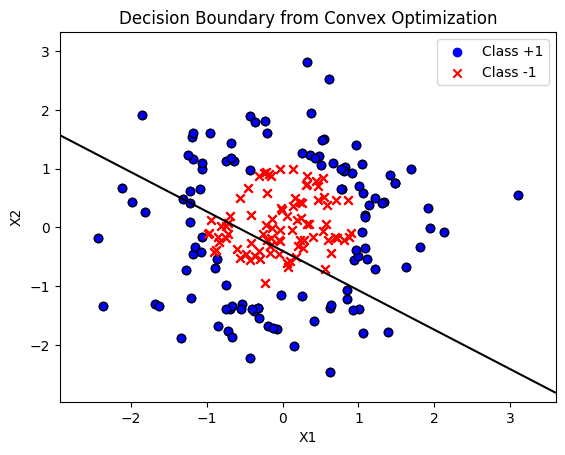

In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

def neural_network_convex_optimizer():
    def relu(x):
        return np.maximum(0, x)

    def drelu(x):
        return x >= 0

    n = 200  # increased the number of data points for better visualization
    d = 3
    X = np.random.randn(n, d-1)
    X = np.append(X, np.ones((n, 1)), axis=1)
    y = ((np.linalg.norm(X[:, 0:d-1], axis=1) > 1) - 0.5) * 2
    beta = 1e-4

    dmat = np.empty((n, 0))
    for i in range(int(1e2)):
        u = np.random.randn(d, 1)
        dmat = np.append(dmat, drelu(np.dot(X, u)), axis=1)

    dmat = np.unique(dmat, axis=1)

    m1 = dmat.shape[1]
    Uopt1 = cp.Variable((d, m1))
    Uopt2 = cp.Variable((d, m1))
    yopt1 = cp.sum(cp.multiply(dmat, (X @ Uopt1)), axis=1)
    yopt2 = cp.sum(cp.multiply(dmat, (X @ Uopt2)), axis=1)
    cost = cp.sum(cp.pos(1 - cp.multiply(y, yopt1 - yopt2))) / n + beta * (cp.mixed_norm(Uopt1.T, 2, 1) + cp.mixed_norm(Uopt2.T, 2, 1))
    constraints = []
    constraints += [cp.multiply((2 * dmat - np.ones((n, m1))), (X @ Uopt1)) >= 0]
    constraints += [cp.multiply((2 * dmat - np.ones((n, m1))), (X @ Uopt2)) >= 0]
    prob = cp.Problem(cp.Minimize(cost), constraints)
    prob.solve()

    # Visualization
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', marker='o', label='Class +1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='red', marker='x', label='Class -1')

    # Create a grid to evaluate the model
    xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
    yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)
    YY, XX = np.meshgrid(yy, xx)
    grid = np.c_[XX.ravel(), YY.ravel()]
    grid = np.append(grid, np.ones((grid.shape[0], 1)), axis=1)

    # Using the optimized weights to compute the values for each point on the grid
    Z_train = np.sum(cp.multiply(dmat, X @ Uopt1).value - cp.multiply(dmat, X @ Uopt2).value, axis=1)
    plt.scatter(X[Z_train >= 0][:, 0], X[Z_train >= 0][:, 1], c='blue', marker='o', edgecolors='k')
    plt.scatter(X[Z_train < 0][:, 0], X[Z_train < 0][:, 1], c='red', marker='x', edgecolors='k')

    prob = cp.Problem(cp.Minimize(cost), constraints)
    prob.solve()
    cvx_opt = prob.value

    print("Convex program objective value (eq (8)): ", cvx_opt)


    # Plotting the decision boundary
    # Compute the average of Uopt1 and Uopt2
    U_avg = 0.5 * (Uopt1.value + Uopt2.value)

# Calculate dot product for each grid point
    Z = grid @ U_avg

# Average over the second dimension to get a single value for each grid point
    Z = np.mean(Z, axis=1)

# Reshape Z
    Z = Z.reshape(XX.shape)

# Plot
    plt.contour(XX, YY, Z, levels=[0], colors='black')


    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.title('Decision Boundary from Convex Optimization')
    plt.show()

neural_network_convex_optimizer()


# **5. Custom Adapter (with our own Convex model)**

In [3]:
import json

import sys
import openai
import os

from llama_index.finetuning import (
    generate_qa_embedding_pairs,
    EmbeddingQAFinetuneDataset,
)
from llama_index import SimpleDirectoryReader
from llama_index.node_parser import SimpleNodeParser
from llama_index.schema import MetadataMode

In [4]:
from llama_index.embeddings.adapter_utils import BaseAdapter
import torch.nn.functional as F
from torch import nn, Tensor
from typing import Dict
import numpy as np
from llama_index.finetuning import EmbeddingAdapterFinetuneEngine
from llama_index.embeddings import OpenAIEmbedding
from llama_index.finetuning import EmbeddingAdapterFinetuneEngine


In [6]:
# [Optional] Load
train_dataset = EmbeddingQAFinetuneDataset.from_json("train_dataset.json")
val_dataset = EmbeddingQAFinetuneDataset.from_json("val_dataset.json")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Stanford_Research/Work/finetune-embedding-main/data')

import eval_utils

from eval_utils import evaluate, display_results


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cvxpy as cp
import numpy as np
import torch
from torch import nn
from llama_index.embeddings.adapter_utils import BaseAdapter

class CVXPYAdapter(BaseAdapter):
    def __init__(self, d=3, n=10, beta=1e-4):
        super(CVXPYAdapter, self).__init__()

        self.d = d
        self.n = n
        self.beta = beta
        self.dmat = None

    def _finite_approximation(self, X_np):
        dmat = []
        for i in range(int(1e2)):
            if len(X_np.shape) == 1:
              u = np.random.randn(X_np.shape[0], 1)
            else:
              u = np.random.randn(X_np.shape[1], 1)

            dmat_rows = (np.maximum(0, np.dot(X_np, u)) >= 0).astype(int)
            dmat.extend(list(dmat_rows))
        dmat = np.array(dmat)
        dmat_unique_rows = np.unique(dmat, axis=0)
        return dmat_unique_rows

    def forward(self, embed: torch.Tensor) -> torch.Tensor:
        X_np = embed.detach().cpu().numpy()

        if self.dmat is None:
            self.dmat = self._finite_approximation(X_np)

        #print("X_np shape:", X_np.shape)
        #print("dmat shape:", self.dmat.shape)

        if len(X_np.shape) == 1:
            y = ((np.linalg.norm(X_np[:self.d-1]) > 1) - 0.5) * 2
        else:
            y = ((np.linalg.norm(X_np[:, :self.d-1], axis=1) > 1) - 0.5) * 2
        y = y.reshape(-1, 1)

        if len(X_np.shape) == 1:
          X_np = X_np.reshape(-1, 1)  # Convert to 2D column vector

        if self.dmat is None:
          self.dmat = self._finite_approximation(X_np)

        if len(self.dmat.shape) == 1:
          m1 = 1
          self.dmat = self.dmat.reshape(-1, 1)  # Convert to 2D column vector
        else:
            m1 = self.dmat.shape[1]


        Uopt1 = cp.Variable((X_np.shape[1], m1))


        Uopt2 = cp.Variable((X_np.shape[1], m1))

        yopt1 = cp.sum(cp.multiply(self.dmat, cp.matmul(X_np, Uopt1)), axis=1, keepdims=True)
        yopt2 = cp.sum(cp.multiply(self.dmat, cp.matmul(X_np, Uopt2)), axis=1, keepdims=True)

        #print("y shape:", y.shape)
        #print("yopt1 shape:", yopt1.shape)
        #print("yopt2 shape:", yopt2.shape)

        cost = cp.sum(cp.pos(1 - cp.multiply(y, yopt1 - yopt2))) / self.n + self.beta * (
            cp.mixed_norm(Uopt1.T, 2, 1) + cp.mixed_norm(Uopt2.T, 2, 1)
        )

        constraints = [cp.multiply((2 * self.dmat - np.ones(self.dmat.shape)), cp.matmul(X_np, Uopt1)) >= 0]
        constraints += [cp.multiply((2 * self.dmat - np.ones(self.dmat.shape)), cp.matmul(X_np, Uopt2)) >= 0]

        prob = cp.Problem(cp.Minimize(cost), constraints)
        prob.solve()

        # Ensure the output tensor has the right shape
        Uopt1_torch = torch.from_numpy(Uopt1.value).float().to(embed.device)
        Uopt1_torch.requires_grad = True
        if Uopt1_torch.shape[0] == 1536:
            Uopt1_torch = Uopt1_torch.T

        return Uopt1_torch

    def get_config_dict(self):
        return {
            "d": self.d,
            "n": self.n,
            "beta": self.beta,
        }


In [ ]:
ada = OpenAIEmbedding()
base_embed_model = ada

custom_adapter = CVXPYAdapter(
    384,  # d value
    1024, # n value
    1e-4  # beta value
)

finetune_engine_convex = EmbeddingAdapterFinetuneEngine(
    train_dataset,
    base_embed_model,
    model_output_path="custom_model_output",
    model_checkpoint_path="custom_model_ck",
    adapter_model=custom_adapter,
    epochs=1, # have to change the parameter
    verbose=True,
)


In [ ]:

finetune_engine_convex.finetune()

> Prepared optimizer, scheduler, and loss model.


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

> [Epoch 0] Current loss: 2.219273090362549
> [Epoch 0] Current loss: 2.2996716499328613
> [Epoch 0] Current loss: 3.009641408920288
> [Epoch 0] Current loss: 1.9927579164505005
> [Epoch 0] Current loss: 3.597010612487793
> [Epoch 0] Current loss: 1.979469656944275
> [Epoch 0] Current loss: 2.149313449859619
> [Epoch 0] Current loss: 3.4148874282836914
> [Epoch 0] Current loss: 2.592308282852173
> [Epoch 0] Current loss: 3.124568223953247
> [Epoch 0] Current loss: 2.2477540969848633
> [Epoch 0] Current loss: 2.209721803665161
> [Epoch 0] Current loss: 2.3553555011749268
> [Epoch 0] Current loss: 2.5011308193206787
> [Epoch 0] Current loss: 2.723411798477173
> [Epoch 0] Current loss: 1.9922198057174683
> [Epoch 0] Current loss: 2.2861578464508057
> [Epoch 0] Current loss: 2.5250091552734375
> [Epoch 0] Current loss: 1.6770846843719482
> [Epoch 0] Current loss: 2.8472695350646973
> [Epoch 0] Current loss: 2.135436534881592
> [Epoch 0] Current loss: 2.703723192214966
> [Epoch 0] Current l

In [ ]:
embed_model_custom = finetune_engine_convex.get_finetuned_model(adapter_cls=CVXPYAdapter)

## Evaluate the custom model

In [ ]:

import eval_new_utils
from eval_new_utils import evaluate_new, display_results

In [ ]:
ft_val_results_custom = evaluate(val_dataset, embed_model_custom)


[nltk_data] Downloading package punkt to /tmp/llama_index...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Generating embeddings:   0%|          | 0/395 [00:00<?, ?it/s]

  0%|          | 0/790 [00:00<?, ?it/s]


ValueError: ignored

## Testing a new custom model

In [17]:
!pip uninstall numpy cvxpy
!pip install numpy cvxpy


Found existing installation: numpy 1.26.0
Uninstalling numpy-1.26.0:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.10/dist-packages/numpy-1.26.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.26.0
Found existing installation: cvxpy 1.4.0
Uninstalling cvxpy-1.4.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/_cvxcore.cpython-310-x86_64-linux-gnu.so
    /usr/local/lib/python3.10/dist-packages/_cvxpy_sparsecholesky.cpython-310-x86_64-linux-gnu.so
    /usr/local/lib/python3.10/dist-packages/cvxpy-1.4.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/cvxpy/*
    /usr/local/lib/python3.10/dist-packages/setup/*
Proceed (Y

In [8]:

from llama_index.finetuning import EmbeddingAdapterFinetuneEngine
from llama_index.embeddings import resolve_embed_model
import torch

In [9]:
import cvxpy as cp
import numpy as np
import torch
from torch import nn
from llama_index.embeddings.adapter_utils import BaseAdapter
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
from llama_index.embeddings.adapter_utils import BaseAdapter


class CVXPYAdapter2(BaseAdapter):
    def __init__(self, d=3, n=10, beta=1e-4):
        super(CVXPYAdapter2, self).__init__()

        self.d = d
        self.n = n
        self.beta = beta
        self.dmat = None

    def _finite_approximation(self, X_np):
        dmat = []
        for i in range(int(1e2)):
            if len(X_np.shape) == 1:
              u = np.random.randn(X_np.shape[0], 1)
            else:
              u = np.random.randn(X_np.shape[1], 1)

            dmat_rows = (np.maximum(0, np.dot(X_np, u)) >= 0).astype(int)
            dmat.extend(list(dmat_rows))
        dmat = np.array(dmat)
        dmat_unique_rows = np.unique(dmat, axis=0)
        return dmat_unique_rows

    def forward(self, embed: torch.Tensor) -> torch.Tensor:
        X_np = embed.detach().cpu().numpy()
        if X_np.shape == (1536,):
          X_np = X_np.reshape(-1, 1)


        if self.dmat is None:
            self.dmat = self._finite_approximation(X_np)

        print("X_np shape:", X_np.shape)
        #print("dmat shape:", self.dmat.shape)



        if len(X_np.shape) == 1:
            y = ((np.linalg.norm(X_np[:self.d-1]) > 1) - 0.5) * 2
        else:
            y = ((np.linalg.norm(X_np[:, :self.d-1], axis=1) > 1) - 0.5) * 2
        y = y.reshape(-1, 1)

        if len(X_np.shape) == 1:
          X_np = X_np.reshape(-1, 1)  # Convert to 2D column vector

        if self.dmat is None:
          self.dmat = self._finite_approximation(X_np)

        if len(self.dmat.shape) == 1:
          m1 = 1
          self.dmat = self.dmat.reshape(-1, 1)  # Convert to 2D column vector
        else:
            m1 = self.dmat.shape[1]


        Uopt1 = cp.Variable((X_np.shape[1], m1))


        Uopt2 = cp.Variable((X_np.shape[1], m1))

        yopt1 = cp.sum(cp.multiply(self.dmat, cp.matmul(X_np, Uopt1)), axis=1, keepdims=True)
        yopt2 = cp.sum(cp.multiply(self.dmat, cp.matmul(X_np, Uopt2)), axis=1, keepdims=True)

        #print("y shape:", y.shape)
        #print("yopt1 shape:", yopt1.shape)
        #print("yopt2 shape:", yopt2.shape)

        cost = cp.sum(cp.pos(1 - cp.multiply(y, yopt1 - yopt2))) / self.n + self.beta * (
            cp.mixed_norm(Uopt1.T, 2, 1) + cp.mixed_norm(Uopt2.T, 2, 1)
        )

        constraints = [cp.multiply((2 * self.dmat - np.ones(self.dmat.shape)), cp.matmul(X_np, Uopt1)) >= 0]
        constraints += [cp.multiply((2 * self.dmat - np.ones(self.dmat.shape)), cp.matmul(X_np, Uopt2)) >= 0]

        prob = cp.Problem(cp.Minimize(cost), constraints)
        prob.solve()

        # Ensure the output tensor has the right shape
        Uopt1_torch = torch.from_numpy(Uopt1.value).float().to(embed.device)
        Uopt1_torch.requires_grad = True
        if Uopt1_torch.shape[0] == 1536:
            Uopt1_torch = Uopt1_torch.T

        return Uopt1_torch

    def get_config_dict(self):
        return {
            "d": self.d,
            "n": self.n,
            "beta": self.beta,
        }


In [10]:
ada = OpenAIEmbedding()
base_embed_model = ada

custom_adapter2 = CVXPYAdapter2(
    384,  # d value
    1024, # n value
    1e-4  # beta value
)

finetune_engine_convex_new = EmbeddingAdapterFinetuneEngine(
    train_dataset,
    base_embed_model,
    model_output_path="custom_model_output",
    model_checkpoint_path="custom_model_ck",
    adapter_model=custom_adapter2,
    epochs=1, # have to change the parameter
    verbose=True,
)


In [11]:
finetune_engine_convex_new.finetune()

> Prepared optimizer, scheduler, and loss model.


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

X_np shape: (10, 1536)


/usr/local/lib/python3.10/dist-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


> [Epoch 0] Current loss: 2.2200772762298584
X_np shape: (10, 1536)
> [Epoch 0] Current loss: 2.2992024421691895
X_np shape: (10, 1536)
> [Epoch 0] Current loss: 3.015892267227173
X_np shape: (10, 1536)
> [Epoch 0] Current loss: 2.0122110843658447
X_np shape: (10, 1536)
> [Epoch 0] Current loss: 3.599036931991577
X_np shape: (10, 1536)
> [Epoch 0] Current loss: 1.9779940843582153
X_np shape: (10, 1536)
> [Epoch 0] Current loss: 2.1502652168273926
X_np shape: (10, 1536)
> [Epoch 0] Current loss: 3.429084300994873
X_np shape: (10, 1536)
> [Epoch 0] Current loss: 2.590691089630127
X_np shape: (10, 1536)
> [Epoch 0] Current loss: 3.123354911804199
X_np shape: (10, 1536)
> [Epoch 0] Current loss: 2.24741530418396
X_np shape: (10, 1536)
> [Epoch 0] Current loss: 2.2086377143859863
X_np shape: (10, 1536)
> [Epoch 0] Current loss: 2.356207847595215
X_np shape: (10, 1536)
> [Epoch 0] Current loss: 2.4977147579193115
X_np shape: (10, 1536)
> [Epoch 0] Current loss: 2.7415027618408203
X_np shape:

In [12]:
embed_model_custom_new = finetune_engine_convex_new.get_finetuned_model(adapter_cls=CVXPYAdapter2)

In [18]:
pwd

'/content'

In [14]:
ft_val_results_custom = evaluate(val_dataset, embed_model_custom_new)


[nltk_data] Downloading package punkt to /tmp/llama_index...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Generating embeddings:   0%|          | 0/395 [00:00<?, ?it/s]

  0%|          | 0/790 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
  0%|          | 0/790 [00:00<?, ?it/s]

X_np shape: (1536, 1)


ValueError: ignored

In [ ]:
print(embed_model_custom_new)

model_name='Adapter for text-embedding-ada-002' embed_batch_size=10 callback_manager=<llama_index.callbacks.base.CallbackManager object at 0x7e40b333f3a0>


In [14]:
from llama_index.schema import TextNode
from llama_index import ServiceContext, VectorStoreIndex
import pandas as pd
from tqdm import tqdm



def evaluate_new2(
    dataset,
    embed_model,
    top_k=5,
    verbose=False,
):
    corpus = dataset.corpus
    queries = dataset.queries
    relevant_docs = dataset.relevant_docs

    service_context = ServiceContext.from_defaults(embed_model=embed_model)
    nodes = [TextNode(id_=id_, text=text) for id_, text in corpus.items()]


    index = VectorStoreIndex(nodes, service_context=service_context, show_progress=True)
    retriever = index.as_retriever(similarity_top_k=top_k)

    eval_results = []
    for query_id, query in tqdm(queries.items()):

        retrieved_nodes = retriever.retrieve(query)
        retrieved_ids = [node.node.node_id for node in retrieved_nodes]
        expected_id = relevant_docs[query_id][0]

        rank = None
        for idx, id in enumerate(retrieved_ids):
            if id == expected_id:
                rank = idx + 1
                break

        is_hit = rank is not None  # assume 1 relevant doc
        mrr = 0 if rank is None else 1 / rank

        eval_result = {
            "is_hit": is_hit,
            "mrr": mrr,
            "retrieved": retrieved_ids,
            "expected": expected_id,
            "query": query_id,
        }
        eval_results.append(eval_result)
    return eval_results


def display_results(names, results_arr):
    """Display results from evaluate."""

    hit_rates = []
    mrrs = []
    for name, results in zip(names, results_arr):
        results_df = pd.DataFrame(results)
        hit_rate = results_df["is_hit"].mean()
        mrr = results_df["mrr"].mean()
        hit_rates.append(hit_rate)
        mrrs.append(mrr)

    final_df = pd.DataFrame({"retrievers": names, "hit_rate": hit_rates, "mrr": mrrs})
    display(final_df)


In [ ]:
ft_val_results_custom_new = evaluate_new2(val_dataset, embed_model_custom_new)


[nltk_data] Downloading package punkt to /tmp/llama_index...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Generating embeddings:   0%|          | 0/395 [00:00<?, ?it/s]

  0%|          | 0/790 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
  0%|          | 0/790 [00:00<?, ?it/s]

X_np shape: (1536, 1)


ValueError: ignored

## New Definition 10-11-23

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from llama_index.embeddings.adapter_utils import BaseAdapter

class CVXPYAdapter3(BaseAdapter):
    def __init__(self, d, n, beta):
        super(CVXPYAdapter3, self).__init__()
        self.d = d
        self.n = n
        self.beta = beta

        # Define the variables/parameters for the model
        self.Uopt1 = nn.Parameter(torch.randn(n, d))
        self.Uopt2 = nn.Parameter(torch.randn(n, d))

        dummy_input = torch.randn((n, d))  # n is the batch size // d is the feature size
        self.dmat = self._finite_approximation(dummy_input).float()

        print("dmat shape:", self.dmat.shape)

        print("Uopt1 shape:", self.Uopt1.shape)


    def _finite_approximation(self, X):
        dmat = torch.zeros((self.n, self.n), device=X.device)  # initialize an n x n matrix

        for i in range(self.n):
          u = torch.randn(X.size(1), 1, device=X.device)  # random vector of shape (d, 1)
          vec = (F.relu(torch.matmul(X, u)) >= 0).int()  # binary vector of shape (n, 1)
          dmat[:, i] = vec.squeeze()  # fill the i-th column of dmat
        return dmat

    def forward(self, embed: torch.Tensor) -> torch.Tensor:
        y = ((torch.norm(embed[:, :self.d-1], dim=1) > 1).float() - 0.5) * 2
        y = y.view(-1, 1)

        yopt1 = torch.sum(self.dmat * torch.matmul(embed, self.Uopt1), dim=1, keepdim=True)
        yopt2 = torch.sum(self.dmat * torch.matmul(embed, self.Uopt2), dim=1, keepdim=True)

        print("yopt1 shape:", yopt1.shape)
        print("yopt2 shape:", yopt2.shape)
        print("Shapes before multiplication:", self.dmat.shape, embed.shape, self.Uopt1.shape)


        return yopt1 - yopt2

    def get_config_dict(self):
        return {
            "d": self.d,
            "n": self.n,
            "beta": self.beta,
        }


In [34]:
import torch
from torch import nn
import torch.nn.functional as F
from llama_index.embeddings.adapter_utils import BaseAdapter

class CVXPYAdapter4(BaseAdapter):
    def __init__(self, d, n, beta):
        super(CVXPYAdapter4, self).__init__()
        self.d = d  # feature size
        self.n = n  # batch size
        self.beta = beta

        # Define the variables/parameters for the model
        self.Uopt1 = nn.Parameter(torch.randn(n, d))
        self.Uopt2 = nn.Parameter(torch.randn(n, d))

        self.plane_defined = False
        self.dmat = torch.randn((n,d))

        print("dmat shape:", self.dmat.shape)  # should now print: torch.Size([n, d])

        print("Uopt1 shape:", self.Uopt1.shape)


    def _finite_approximation(self, X):

        self.plane_defined = True

        for i in range(self.n):
                u = torch.randn(X.size(1), device=X.device)  # random vector of shape (d)
                vec = (F.relu(torch.matmul(X, u)) >= 0).int()  # binary vector of shape (n)
                self.dmat[i, j] = vec  # fill the i-th face, j-th column of dmat

    def forward(self, embed: torch.Tensor) -> torch.Tensor:

        if self.plane_defined == False:
            _finite_approximation()
        y = ((torch.norm(embed[:, :self.d-1], dim=1) > 1).float() - 0.5) * 2
        y = y.view(-1, 1)

        print("Shapes before multiplication:")
        print("dmat:", self.dmat.shape)
        print("embed:", embed.shape)
        print("Uopt1:", self.Uopt1.shape)
        result_after_matmul = torch.matmul(embed, self.Uopt1)
        print("result_after_matmul:", result_after_matmul.shape)
        result_after_unsqueeze = torch.unsqueeze(result_after_matmul, 2)
        print("result_after_unsqueeze:", result_after_unsqueeze.shape)

        # Need to modify the calculation of yopt1 and yopt2 because dmat is now 3D
        # This might involve additional operations (e.g., another sum or mean) along the new dimension.
        # Below is just a placeholder; you need to adjust it based on your specific requirements.
        dmat_reduced = self.dmat[:embed.size(0), ...]  # This now should have shape [10, 1536, 100]

        yopt1 = torch.sum(torch.sum(dmat_reduced * result_after_unsqueeze, dim=1), dim=1, keepdim=True)
        yopt2 = torch.sum(torch.sum(dmat_reduced * torch.unsqueeze(torch.matmul(embed, self.Uopt2), 2), dim=1), dim=1, keepdim=True)

        print("yopt1 shape:", yopt1.shape)
        print("yopt2 shape:", yopt2.shape)
        print("Shapes before multiplication:", self.dmat.shape, embed.shape, self.Uopt1.shape)

        return yopt1 - yopt2

    def get_config_dict(self):
        return {
            "d": self.d,
            "n": self.n,
            "beta": self.beta,
        }


In [35]:
from llama_index.finetuning import EmbeddingAdapterFinetuneEngine
from llama_index.embeddings import resolve_embed_model
import torch

ada = OpenAIEmbedding()
base_embed_model = ada

custom_adapter = CVXPYAdapter4(
    d=100,   # Adjusted d value to match input feature size
    n=1536,   # This might need adjustment based on its actual role in your model
    beta=1e-4 # beta value
)



finetune_engine_convex3 = EmbeddingAdapterFinetuneEngine(
    train_dataset,
    base_embed_model,
    model_output_path="custom_model_output",
    model_checkpoint_path="custom_model_ck",
    adapter_model=custom_adapter,
    epochs=1, # have to change the parameter
    verbose=True,
)


dmat shape: torch.Size([1536, 1536, 100])
Uopt1 shape: torch.Size([1536, 100])


In [36]:
finetune_engine_convex3.finetune()

> Prepared optimizer, scheduler, and loss model.


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

Shapes before multiplication:
dmat: torch.Size([1536, 1536, 100])
embed: torch.Size([10, 1536])
Uopt1: torch.Size([1536, 100])
result_after_matmul: torch.Size([10, 100])
result_after_unsqueeze: torch.Size([10, 100, 1])


RuntimeError: ignored

In [26]:
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
import cvxpy as cp
from llama_index.embeddings.adapter_utils import BaseAdapter

class CVXPYAdapter5(BaseAdapter):
    def __init__(
            self,
            in_features: int,
            hidden_features: int,
            out_features: int,
            bias: bool = True,
            add_residual: bool = True,
        ) -> None:
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.bias = bias
        self.add_residual = add_residual

        # Initialize the linear layers with None, they will be defined in the forward pass
        self.linear1 = None
        self.linear2 = None

        # Residual connection
        if self.add_residual:
            self.residual_weight = nn.Parameter(torch.zeros(1))

        # Convex optimization parameters
        self.beta = 1e-4

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        # Convert input tensors to numpy for cvxpy compatibility
        X_np = X.detach().cpu().numpy()
        n, d = X_np.shape

        dmat = np.empty((n, 0))
        for i in range(int(1e2)):  # Finite approximation of all possible sign patterns
            u = np.random.randn(d, 1)
            dmat = np.append(dmat, np.greater_equal(np.dot(X_np, u), 0), axis=1)
        dmat = np.unique(dmat, axis=1)

        # Optimal CVX
        m1 = dmat.shape[1]
        Uopt1 = cp.Variable((d, m1))
        Uopt2 = cp.Variable((d, m1))

        # Define the cost function
        yopt1 = cp.sum(cp.multiply(dmat, (X_np @ Uopt1)), axis=1)
        yopt2 = cp.sum(cp.multiply(dmat, (X_np @ Uopt2)), axis=1)
        cost = cp.sum(cp.pos(yopt1 - yopt2)) / n + self.beta * (cp.norm(Uopt1, 'fro') + cp.norm(Uopt2, 'fro'))

        constraints = [
            cp.multiply((2 * dmat - np.ones((n, m1))), (X_np @ Uopt1)) >= 0,
            cp.multiply((2 * dmat - np.ones((n, m1))), (X_np @ Uopt2)) >= 0
        ]

        prob = cp.Problem(cp.Minimize(cost), constraints)
        prob.solve()

        cvx_opt = prob.value
        print("Convex program objective value: ", cvx_opt)

        # Set the linear layers with the appropriate output features size
        self.linear1 = nn.Linear(self.in_features, m1, bias=self.bias)
        self.linear2 = nn.Linear(m1, self.out_features, bias=self.bias)

        with torch.no_grad():
            self.linear1.weight = nn.Parameter(torch.from_numpy(Uopt1.value).float())
            self.linear2.weight = nn.Parameter(torch.from_numpy(Uopt2.value).float())

        # Forward pass
        output1 = F.relu(self.linear1(X))
        output2 = self.linear2(output1)
        if self.add_residual:
            output2 += self.residual_weight * X

        return output2

    def get_config_dict(self) -> dict:
        return {
            "in_features": self.in_features,
            "out_features": self.out_features,
            "bias": self.bias,
            "add_residual": self.add_residual,
        }

    def extra_repr(self) -> str:
        return 'in_features={}, out_features={}, bias={}, add_residual={}'.format(
            self.in_features, self.out_features, self.bias, self.add_residual
        )


In [27]:
from llama_index.finetuning import EmbeddingAdapterFinetuneEngine
from llama_index.embeddings import resolve_embed_model
import torch

# Initialize the OpenAI embedding model (assuming this is a valid object from your imports)
ada = OpenAIEmbedding()
base_embed_model = ada

# Define your custom neural network adapter with specified layer dimensions,
# bias inclusion, and residual connections.
custom_adapter = CVXPYAdapter5(
    in_features=384,  # input dimension
    hidden_features=1024,  # hidden dimension
    out_features=384,  # output dimension
    bias=True,  # include bias neurons
    add_residual=True,  # include residual connections
)

# Create an engine for fine-tuning the embedding model, providing it with all necessary
# components and parameters, such as the dataset, base model, adapter, and training settings.
finetune_engine_5 = EmbeddingAdapterFinetuneEngine(
    dataset=train_dataset,  # the dataset to train on
    embed_model=base_embed_model,  # the pre-trained base embedding model
    model_output_path="custom_model_output",  # path to save the final model
    model_checkpoint_path="custom_model_ck",  # path for saving periodic model checkpoints
    adapter_model=custom_adapter,  # the custom adapter model to be fine-tuned
    epochs=25,  # number of training epochs
    verbose=True,  # verbosity level of training output
)

# Presumably, you would start the training process after this setup.


In [28]:
finetune_engine_5.finetune()

> Prepared optimizer, scheduler, and loss model.


Epoch:   0%|          | 0/25 [00:00<?, ?it/s]

Iteration:   0%|          | 0/67 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


Convex program objective value:  6.24514911714104e-13


RuntimeError: ignored

In [11]:
embed_model_5 = finetune_engine_5.get_finetuned_model(adapter_cls=CVXPYAdapter5)

FileNotFoundError: ignored

In [ ]:
ft_val_results_5 = evaluate(val_dataset, embed_model_5)


Generating embeddings:   0%|          | 0/395 [00:00<?, ?it/s]

  0%|          | 0/790 [00:00<?, ?it/s]


ValueError: ignored

In [ ]:
display_results(["ft_custom"]x, [ft_val_results_custom3])
